In [63]:
#Import Necessory Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [64]:
#Lets Load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [65]:
#Lets check the shape of the dataset
data.shape

(8425, 23)

So, Here we have 8425 Columns and 23 Rows

In [66]:
#Lets Check for all Columns Name
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [67]:
#lets Check for isna
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

We have Lots of Null Values .Lets Count the all Nulls

In [68]:
data.isna().sum().sum()

19472

So, Here we have 19472 Nulls .. We have to treat them . But not right now

In [69]:
#Lets check for datatype
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

So, Here we have Object and Float type data.

In [70]:
#Lets check for info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [71]:
#Check how much data loss
data_loss=((8425-6792)/8425)*100
data_loss

19.382789317507417

So, We removed 19% of the data . Because of Duplicates

In [72]:
#Lets check data
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [73]:
#Lets See all the unique Values in all Columns
data.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

# Feature Engineering and Data Cleaning

As we seen above Date Column is Numerical Column But its Shows as a Object Column 

In [74]:
#lets Convert in Date Time 
data['Date'] = pd.to_datetime(data['Date'])

In [75]:
#Lets Confirm
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Here we can see that we converted 

In [76]:
#Extracting Day from Date_of_journey column
data['Day'] = pd.to_datetime(data.Date,format="%d/%m/%Y").dt.day

#Extracting Month from Date_of_journey column
data['Month'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.month

#Extracting Year from Date_of_journey column
data['Year'] = pd.to_datetime(data.Date, format="%d/%m/%Y").dt.year

In [77]:
#Lets Delete DATE Columns
data.drop(columns='Date',inplace=True)

In [78]:
#Lets Check
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


# Treat Null Values by Fillna Method

In [79]:
#Filling null values in MinTemp with it's mean
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())

#Filling null values in MaxTemp with it's mean
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())

#Filling null values in Rainfall with it's mode, as most of the rows have 0 rainfall.
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mode()[0])

#Filling null values in Evaporation with it's mean
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

#Filling null values in Sunshine with it's mean
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())

#Filling null values in WindGustDir with it's mode
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])

#Filling null values in WindGustSpeed with it's mean
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())

#Filling null values in WindDir9am with it's mode
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])

#Filling null values in WindDir3pm with it's mode
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

#Filling null values in WindSpeed9am with it's mean
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())

#Filling null values in WindSpeed3pm with it's mean
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())

#Filling null values in Humidity9am with it's mean
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())

#Filling null values in Humidity3pm with it's mean
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

#Filling null values in Pressure9am with it's mean
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())

#Filling null values in Pressure3pm with it's mean
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())

#Filling null values in Cloud9am with it's mean
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())

#Filling null values in Cloud3pm with it's mean
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())

#Filling null values in Temp9am with it's mean
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())

#Filling null values in Temp3pm with it's mean
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

#Filling null values in Temp3pm with it's mean
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

#Filling null values in RainToday with it's mode
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])

#Filling null values in RainTomorrow with it's mode
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [80]:
#Lets Confirm
data.isna().sum().sum()

0

So, Here we can see that we dont have  any nulls

In [81]:
#Lets plot heatmap and check for isnull
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


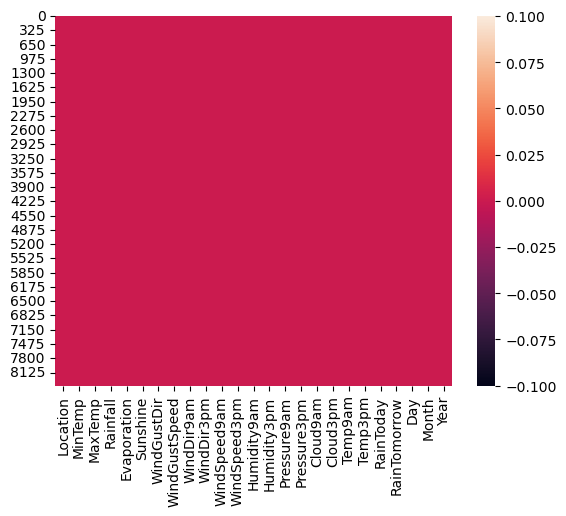

In [82]:
sns.heatmap(data.isna())
plt.show()

Here we confirm that we dont have any nulls.

# Statistical Summary of Dataset

In [83]:
#Lets plot Data Description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8425.0,13.193305,5.379488,-2.0,9.300000,13.200000,17.300000,28.5
MaxTemp,8425.0,23.859976,6.114516,8.2,19.300000,23.300000,28.000000,45.5
Rainfall,8425.0,2.725982,10.319872,0.0,0.000000,0.000000,0.800000,371.0
Evaporation,8425.0,5.389395,3.852004,0.0,4.000000,5.389395,5.389395,145.0
Sunshine,8425.0,7.632205,2.825451,0.0,7.632205,7.632205,8.900000,13.9
WindGustSpeed,8425.0,40.174469,13.776101,7.0,31.000000,40.174469,48.000000,107.0
WindSpeed9am,8425.0,13.847646,10.128579,0.0,6.000000,13.000000,20.000000,63.0
WindSpeed3pm,8425.0,18.533662,9.704759,0.0,11.000000,19.000000,24.000000,83.0
Humidity9am,8425.0,67.822496,16.774231,10.0,56.000000,68.000000,80.000000,100.0
Humidity3pm,8425.0,51.249790,18.311894,6.0,39.000000,51.000000,63.000000,99.0


Observation

- We Dont have null Values

- Evaporation , Rainfall ,WindGustSpeed	,WindSpeed9am are Have Outliers


# Data Visualization 

# data.columns

In [84]:
#checking categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [85]:
# checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


#  Univariate Ananlysis Categorical Columns

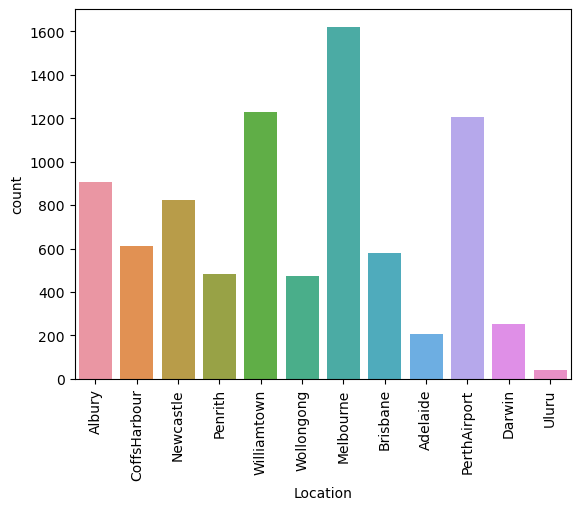

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [86]:
#Lets plot all categorical columns in One Code
sns.countplot(x='Location',data=data)
plt.xticks(rotation=90)
plt.show()
data.Location.value_counts()

We have the highest rainfall data from Melbourbne and least from Uluru

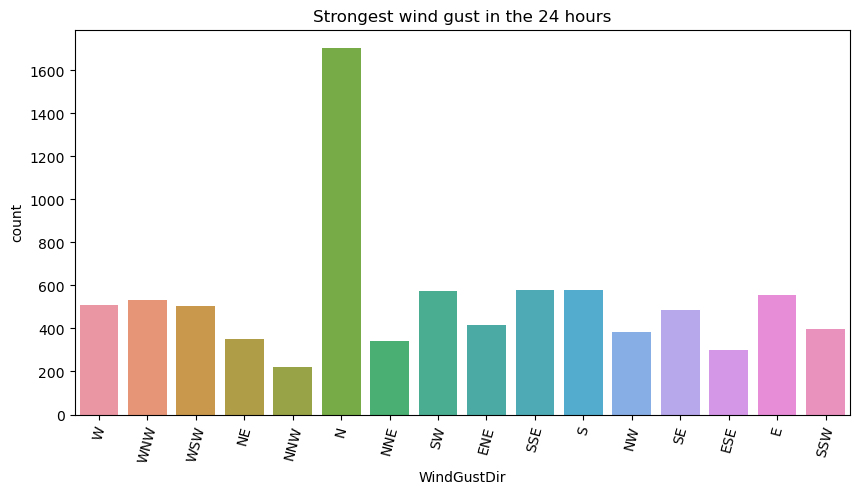

In [87]:
# Visualizing the direction of the strongest wind gust in the 24 hours to midnight
plt.figure(figsize=(10,5))
sns.countplot(data["WindGustDir"])
plt.title("Strongest wind gust in the 24 hours")
plt.xticks(rotation=75)
plt.show()

We can clearly see that the wind gust was strongest towards the north, followed by the SW, SSE, S, WNW.

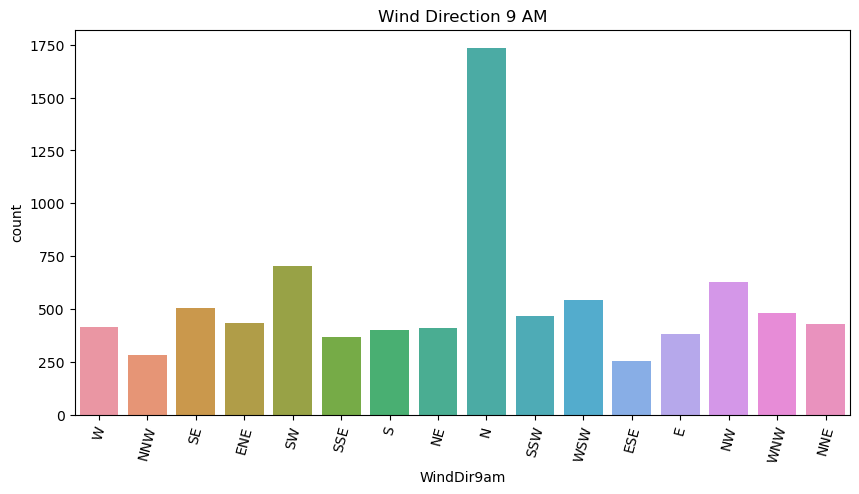

In [88]:
#Visualization of wind at 9 am
plt.figure(figsize=(10,5))
sns.countplot(data["WindDir9am"])
plt.title("Wind Direction 9 AM")
plt.xticks(rotation=75)
plt.show()

In the plots we can clearly see that the wing direction was towards the N at 9am.

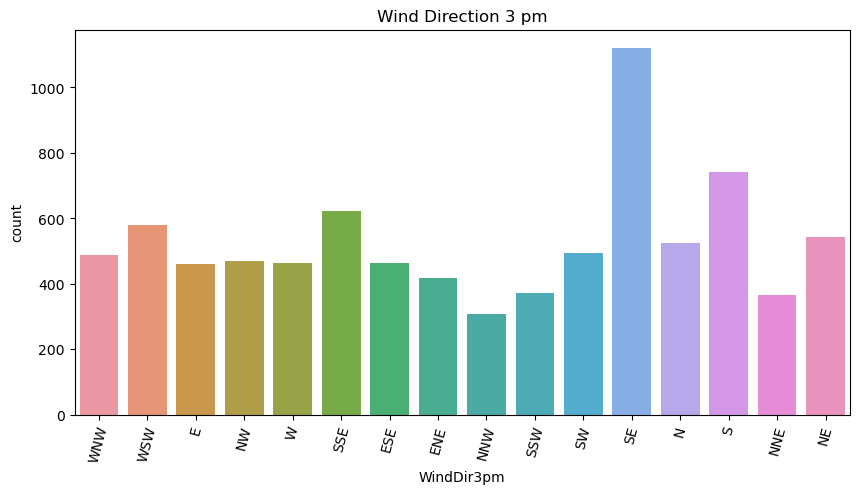

In [89]:
#Visualization of wind at 9 am
plt.figure(figsize=(10,5))
sns.countplot(data["WindDir3pm"])
plt.title("Wind Direction 3 pm")
plt.xticks(rotation=75)
plt.show()

In the plots we can clearly see that the wing direction was towards the SW at 3pm.

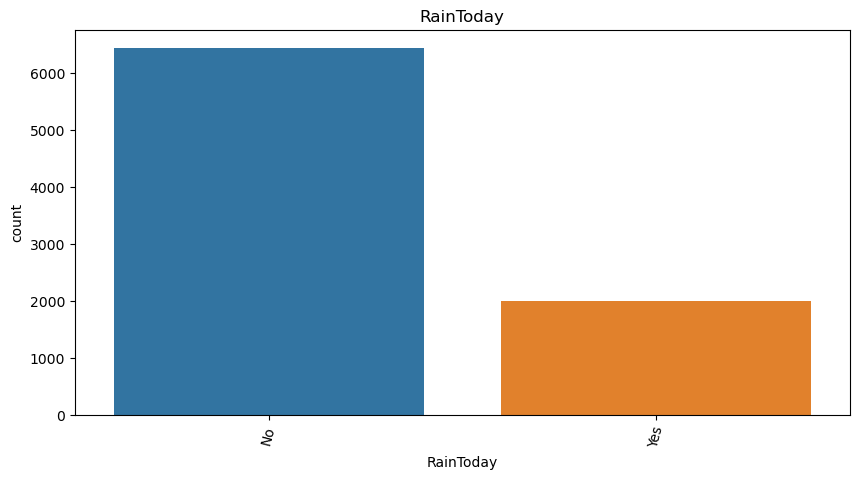

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [90]:
#Visualization of Rain Today
plt.figure(figsize=(10,5))
sns.countplot(data["RainToday"])
plt.title("RainToday")
plt.xticks(rotation=75)
plt.show()
data.RainToday.value_counts()

Observation

Yes - 1990

No - 6435

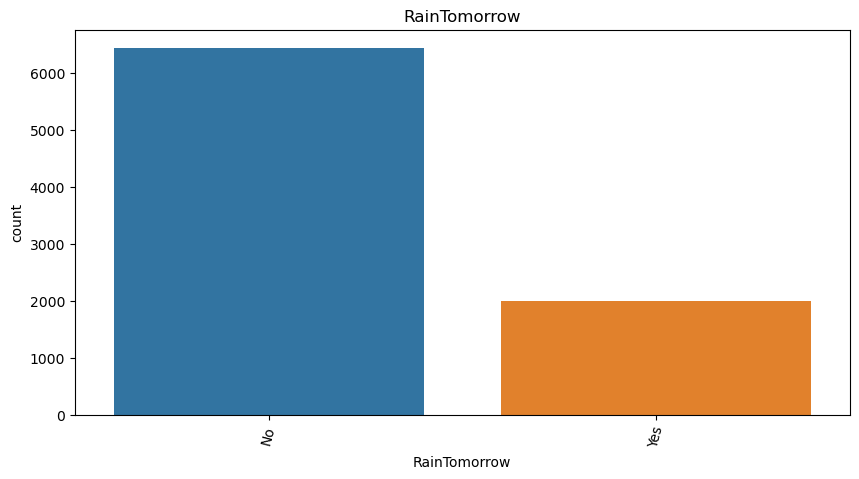

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [91]:
#Lets plot RainTommorow
plt.figure(figsize=(10,5))
sns.countplot(data["RainTomorrow"])
plt.title("RainTomorrow")
plt.xticks(rotation=75)
plt.show()
data.RainTomorrow.value_counts()

Observation


No ->6434

Yes -> 1991


Here we can find that RainToday and RainTomorrow is almost Same.


# Lets Plot Numerical Columns

In [92]:
len(num_col)

19

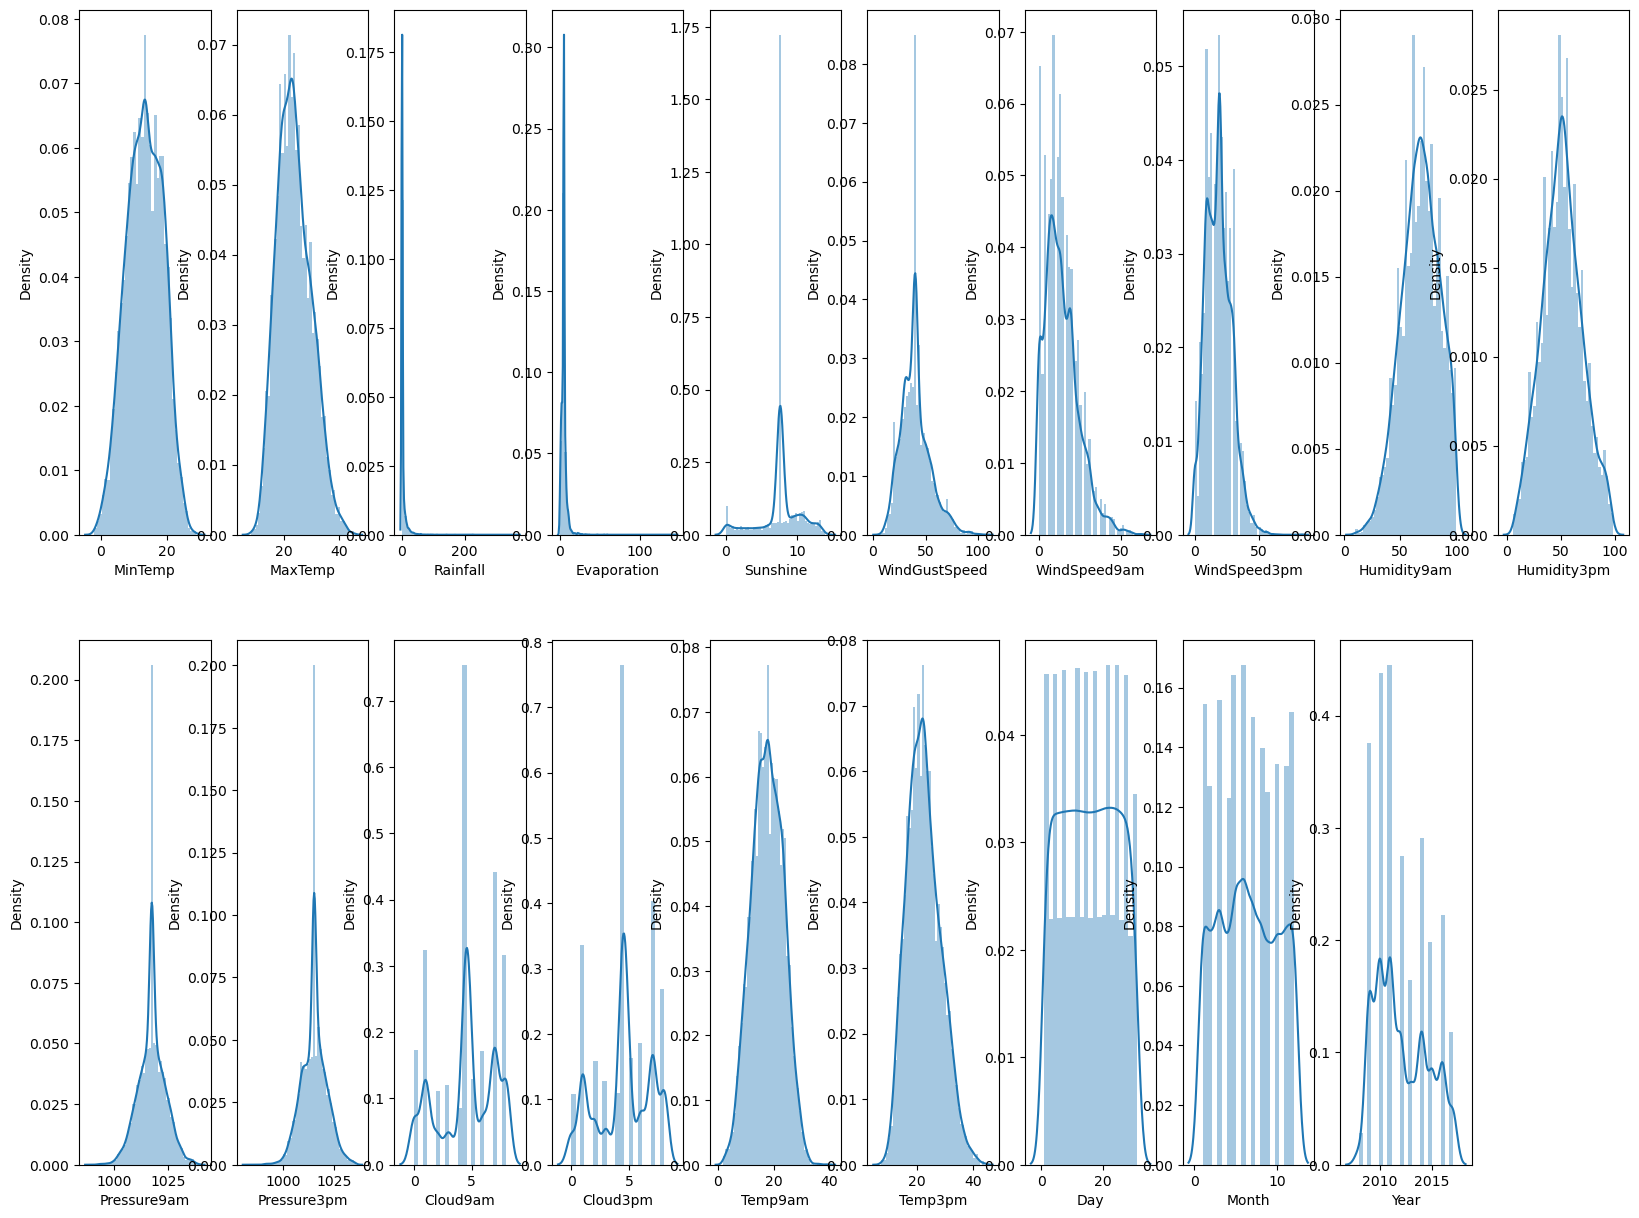

In [93]:
#Lets plot all numerical columns
plt.figure(figsize=(20,15))
plotnumber=1
for col in num_col:
    if plotnumber <=20:
        ax=plt.subplot(2,10,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
    plotnumber +=1
plt.show()

Observation

From the above graph we can not say our dataset is normally distributed.


- Min Temp is normally distributed.
- 
- Max Temp is slightly skewed.
- 
- Rainfall and Evaporation is more skewed.
- 
- Sunshine is not normally distributed.
- 
- WindGustSpeed, WindSpeed9am,WindSpeed3pm is more skewed.
- 
- Humidity9am is slightly skewed and Humidity3pm is normally distributed.
- 
- Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, Day, Month and Year has no skewness however the data is not distributed uniformly.

# Bivariate Analysis

Checking the relation between the features and the two targets we have

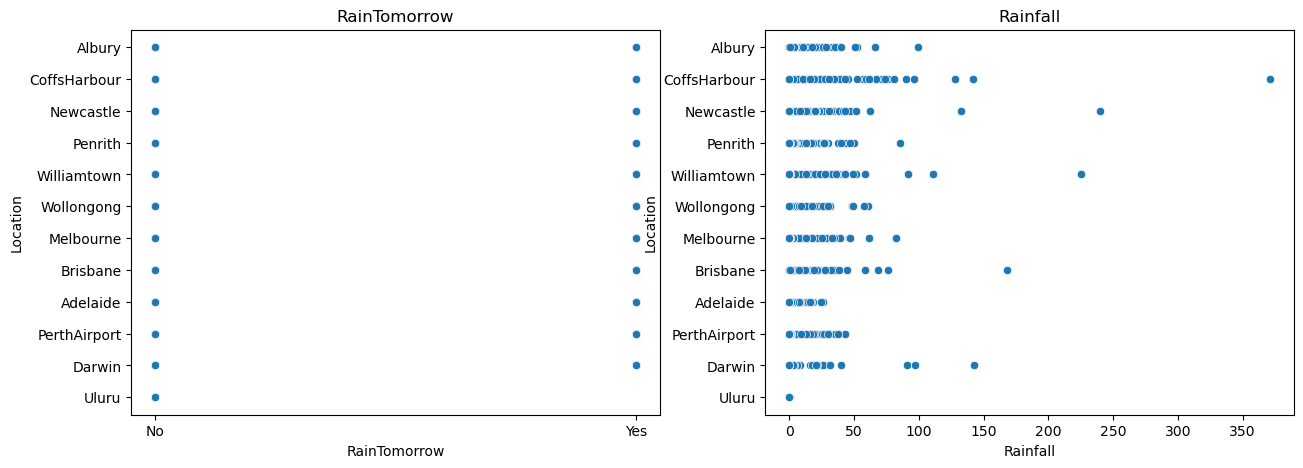

In [94]:
#checking the corelation between location with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='Location',data=data)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='Location',data=data)
plt.show()

We can see that location does not have any major impact on the prediction of rainfall, however we will not drop the feature as prediction is done as per region.

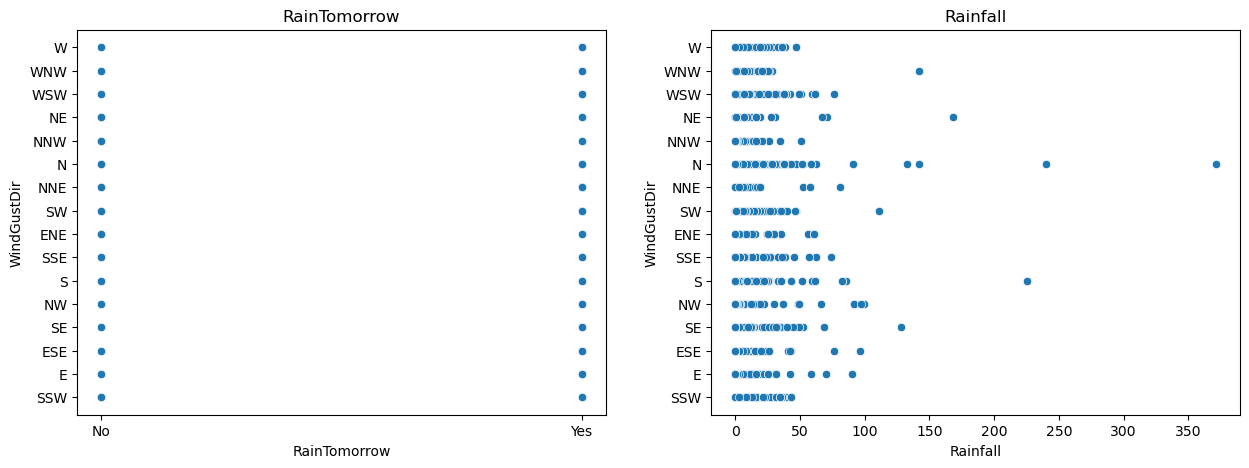

In [95]:
#checking the corelation between WindGustDir with both the targets (Rainfall and Rain Tommorow)
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('RainTomorrow')
sns.scatterplot(x='RainTomorrow',y='WindGustDir',data=data)
plt.subplot(1,2,2)
plt.title('Rainfall')
sns.scatterplot(x='Rainfall',y='WindGustDir',data=data)
plt.show()

From this graph we can observe that there is no linear relation of the feature with both the targets

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

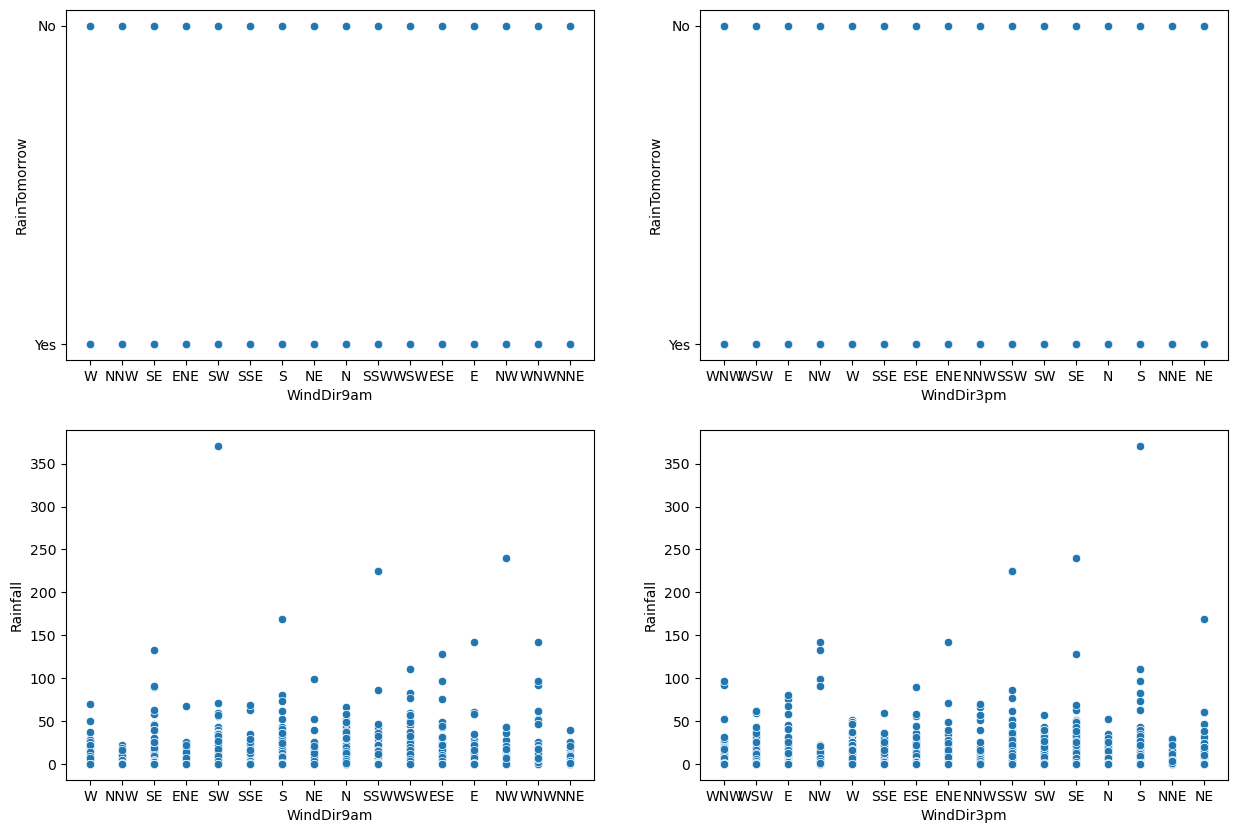

In [96]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindDir9am and RainTomorrow
sns.scatterplot(x='WindDir9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between WindDir3pm and RainTomorrow
sns.scatterplot(x='WindDir3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between WindDir9am and Rainfall
sns.scatterplot(x='WindDir9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between WindDir3pm and Rainfall
sns.scatterplot(x='WindDir3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

We dont find any Relation Between RainFall and WinDir9am ,WindDir3pm

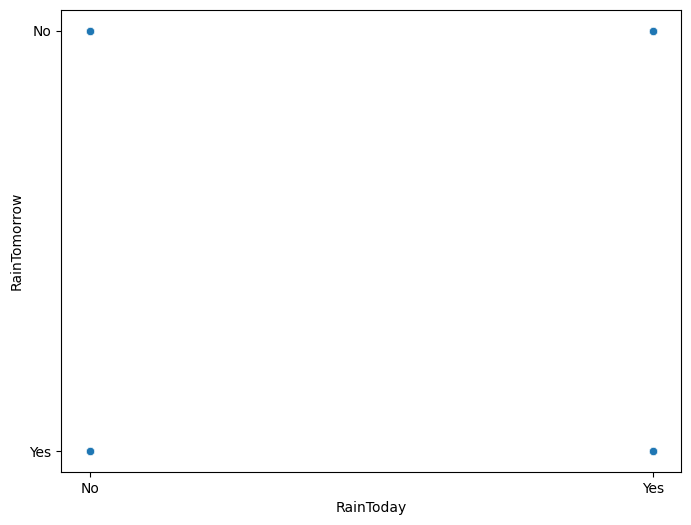

In [97]:
#Checking the relation between Rainfall today and Rainfall Tomorrow
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['RainToday'],y=data['RainTomorrow'])
plt.show()

There is no relation that we can see in the scatter plot.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

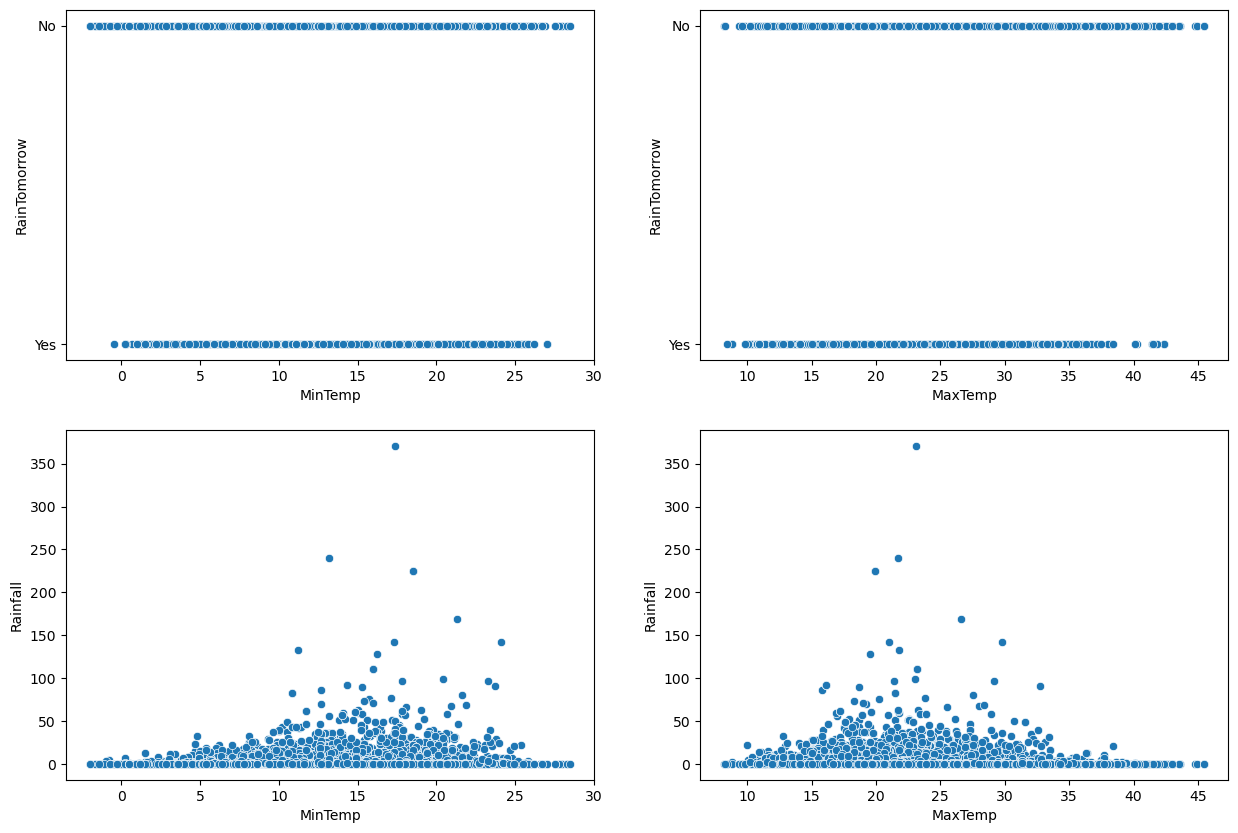

In [98]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between minimum temperature and RainTomorrow
sns.scatterplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],palette="green",data=data)

#checking the relation between max temperature and RainTomorrow
sns.scatterplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between minimum temperature and Rainfall
sns.scatterplot(x='MinTemp',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between max temperature and Rainfall
sns.scatterplot(x='MaxTemp',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observations

We can clearly see from the plotted graphs that there is no linear relation of max temp and min temp with both the targets

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

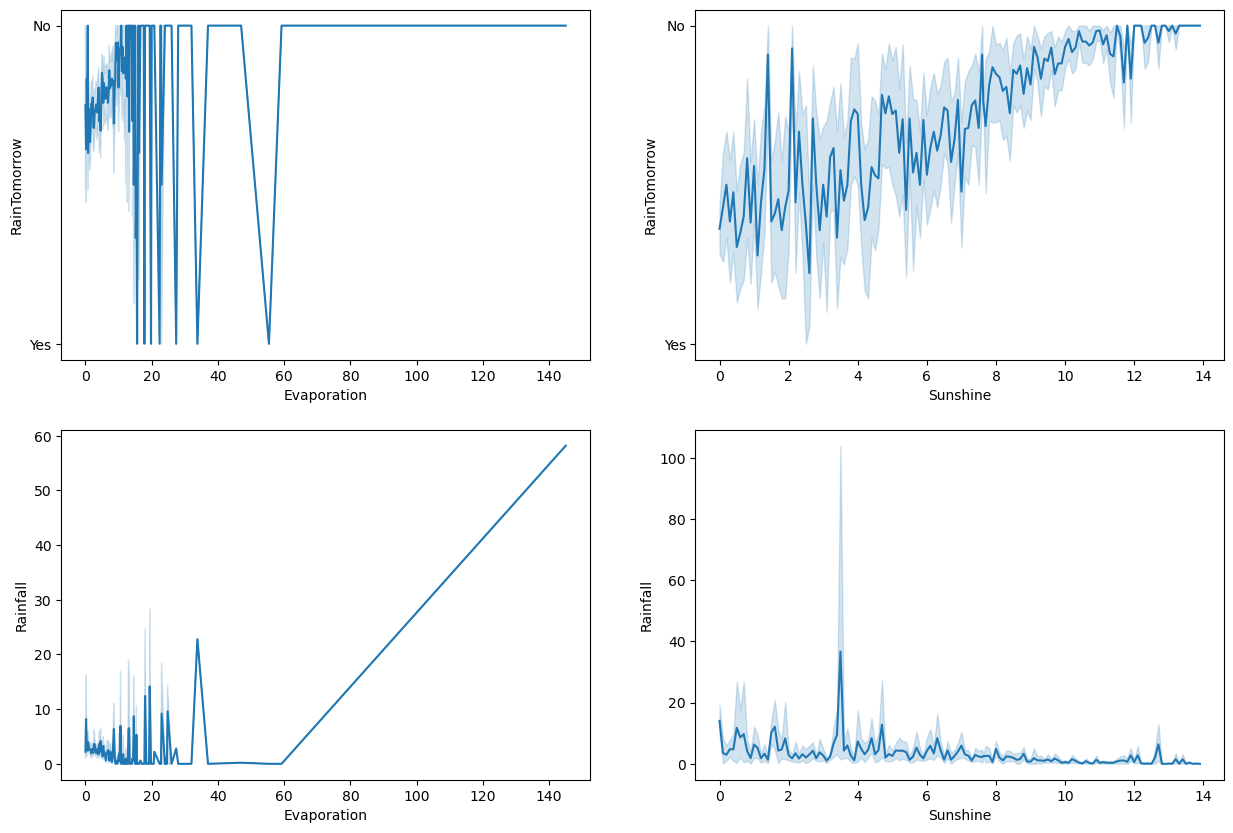

In [99]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Evaporation',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between Sunshine and Rainfall
sns.lineplot(x='Sunshine',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

Evaporation and RainTommorow have Negative Relation

Sunshine and RainTommorow have positive Relation

Rainfall and Evaporation have Positve Relation

Rainfall and Sunshine the dont have anu relation.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

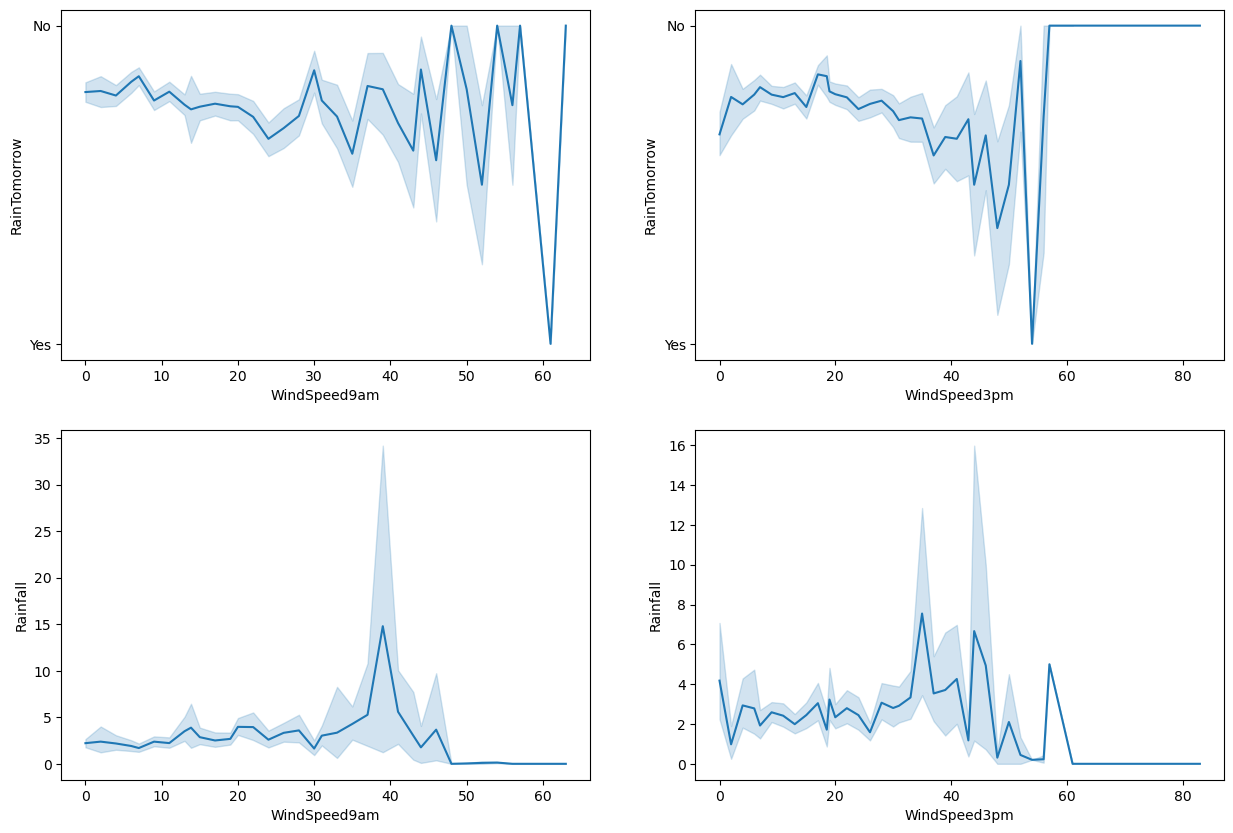

In [100]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between WindSpeed9am and Rainfall
sns.lineplot(x='WindSpeed9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between WindSpeed3pm and Rainfall
sns.lineplot(x='WindSpeed3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

We can see that There is no linear relationship between both target

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

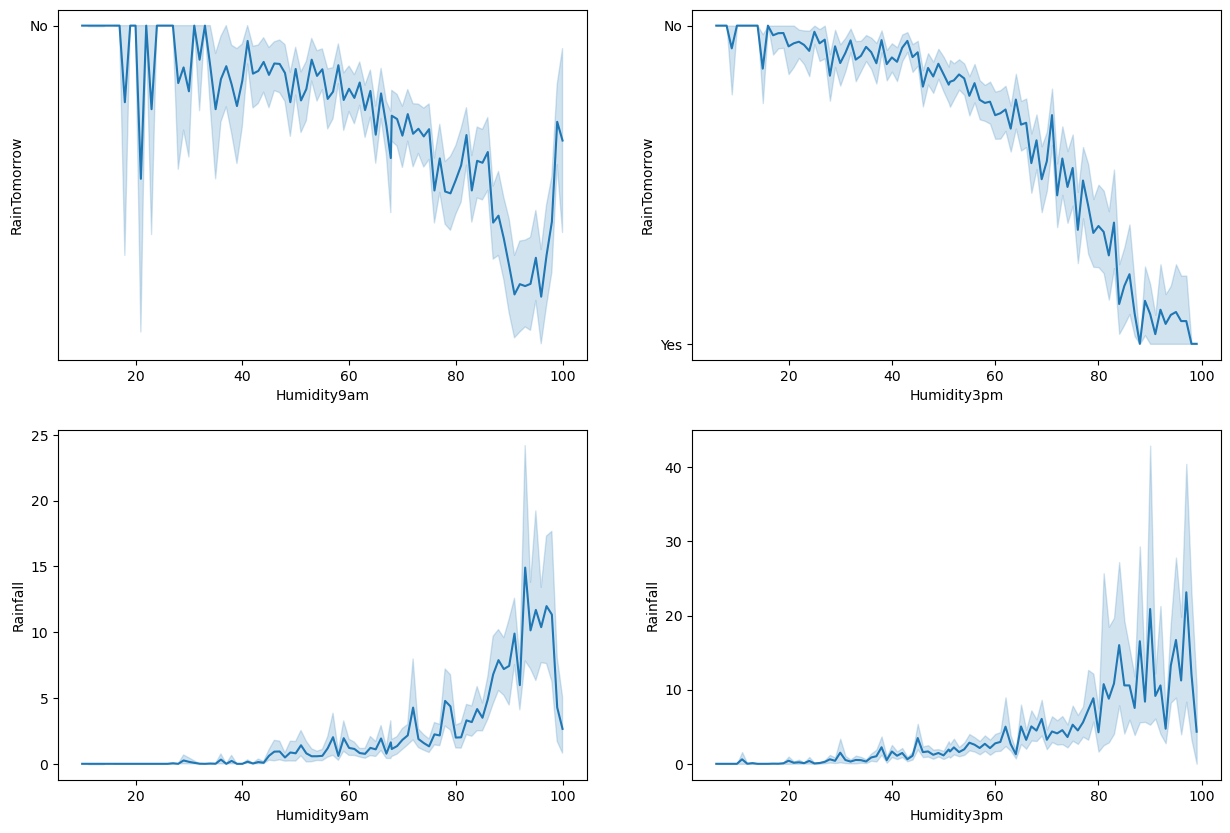

In [101]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between Humidity9am and Rainfall
sns.lineplot(x='Humidity9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between Humidity3pm and Rainfall
sns.lineplot(x='Humidity3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

- RainTommorow and Humidity 9AM has Negative Relationship
- RainTommorow and Humidity 3PM has Negative Relationship
- Rainfall and Humidity 9AM has Some Positive Relationship
- Rainfall and Humidity 3PM has Some Postive Relationship

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

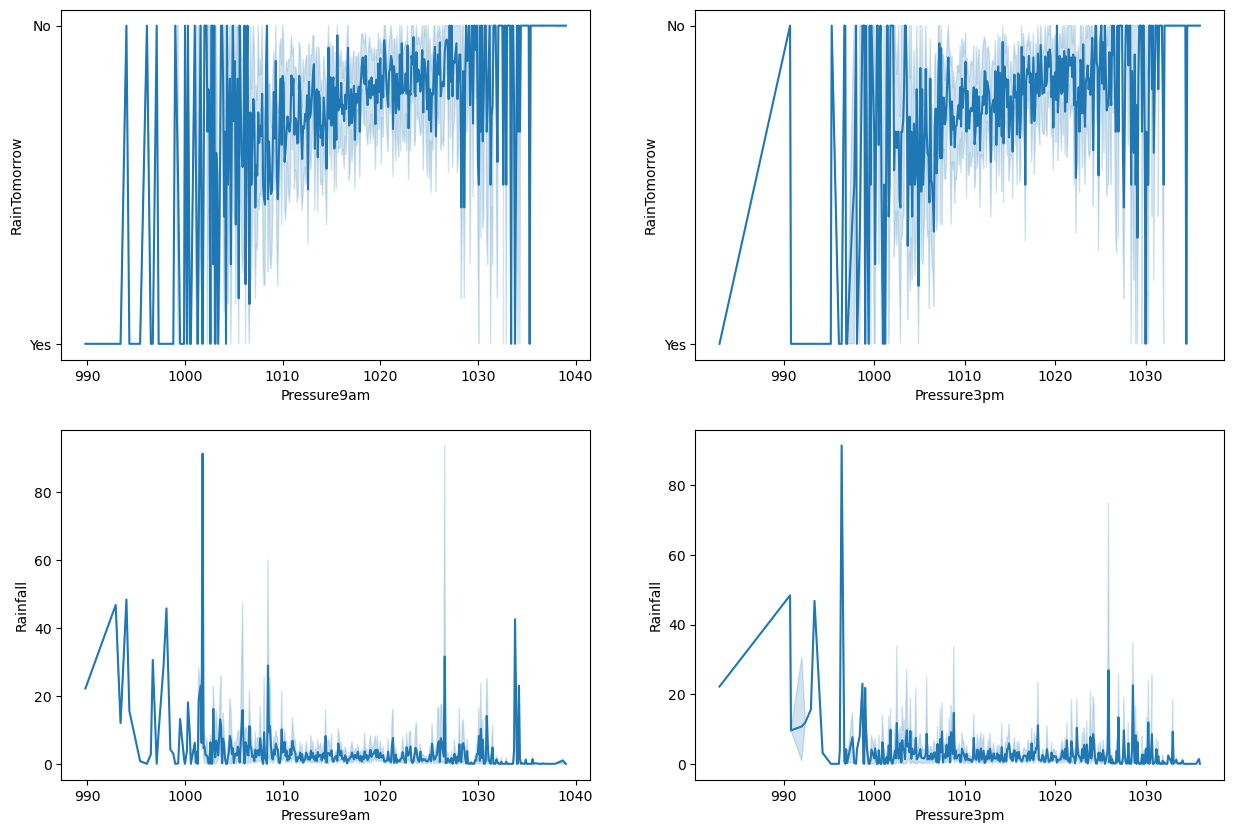

In [102]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between Pressure9am and Rainfall
sns.lineplot(x='Pressure9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between Pressure3pm and Rainfall
sns.lineplot(x='Pressure3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

We can see in the above graph there is no relationship

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

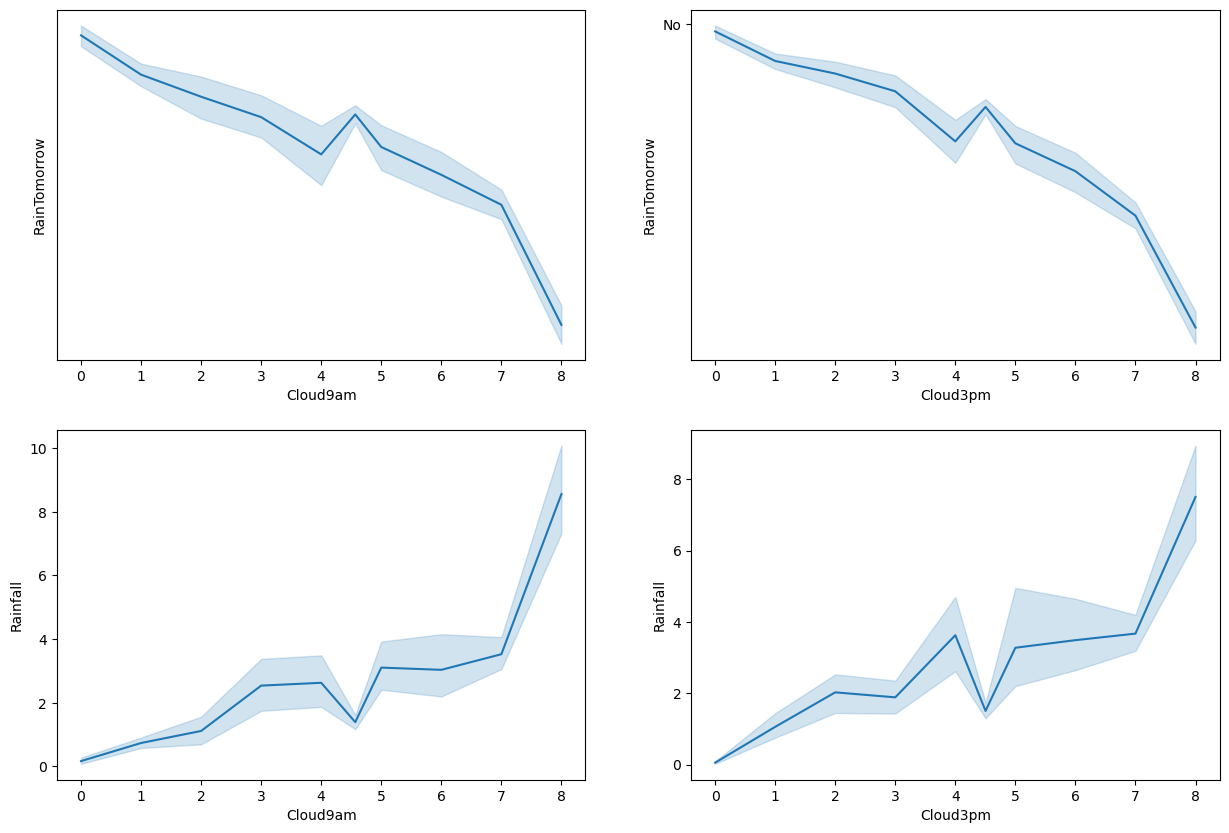

In [103]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between Cloud9am and Rainfall
sns.lineplot(x='Cloud9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between Cloud3pm and Rainfall
sns.lineplot(x='Cloud3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

- Raintommorow and Cloud 9AM have Negative Relationship
- Raintommorow and Cloud 3PM have Negative Relationship
- Rainfall and Cloud 9AM have some positive relationship
- Rainfall and Cloud 3PM have somee Positive Relationship

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

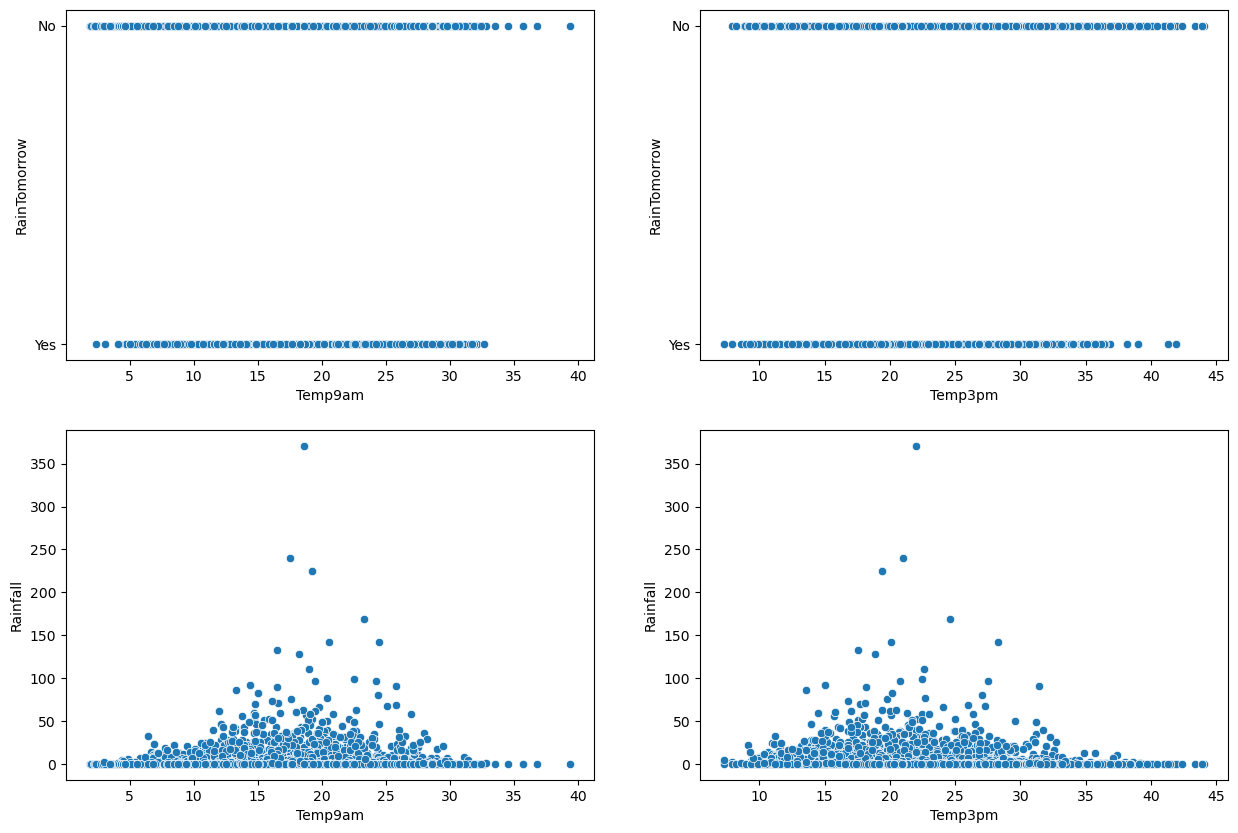

In [104]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Temp9am and RainTomorrow
sns.scatterplot(x='Temp9am',y='RainTomorrow',ax=axes[0,0],palette="OrRd",data=data)

#checking the relation between Temp3pm and RainTomorrow
sns.scatterplot(x='Temp3pm',y='RainTomorrow',ax=axes[0,1],palette="OrRd",data=data)

#checking the relation between Temp9am and Rainfall
sns.scatterplot(x='Temp9am',y='Rainfall',ax=axes[1,0],palette="OrRd",data=data)

#checking the relation between Temp3pm and Rainfall
sns.scatterplot(x='Temp3pm',y='Rainfall',ax=axes[1,1],palette="OrRd",data=data)

Observation

- We can clearly see that there is no relationship in both of the Target.

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

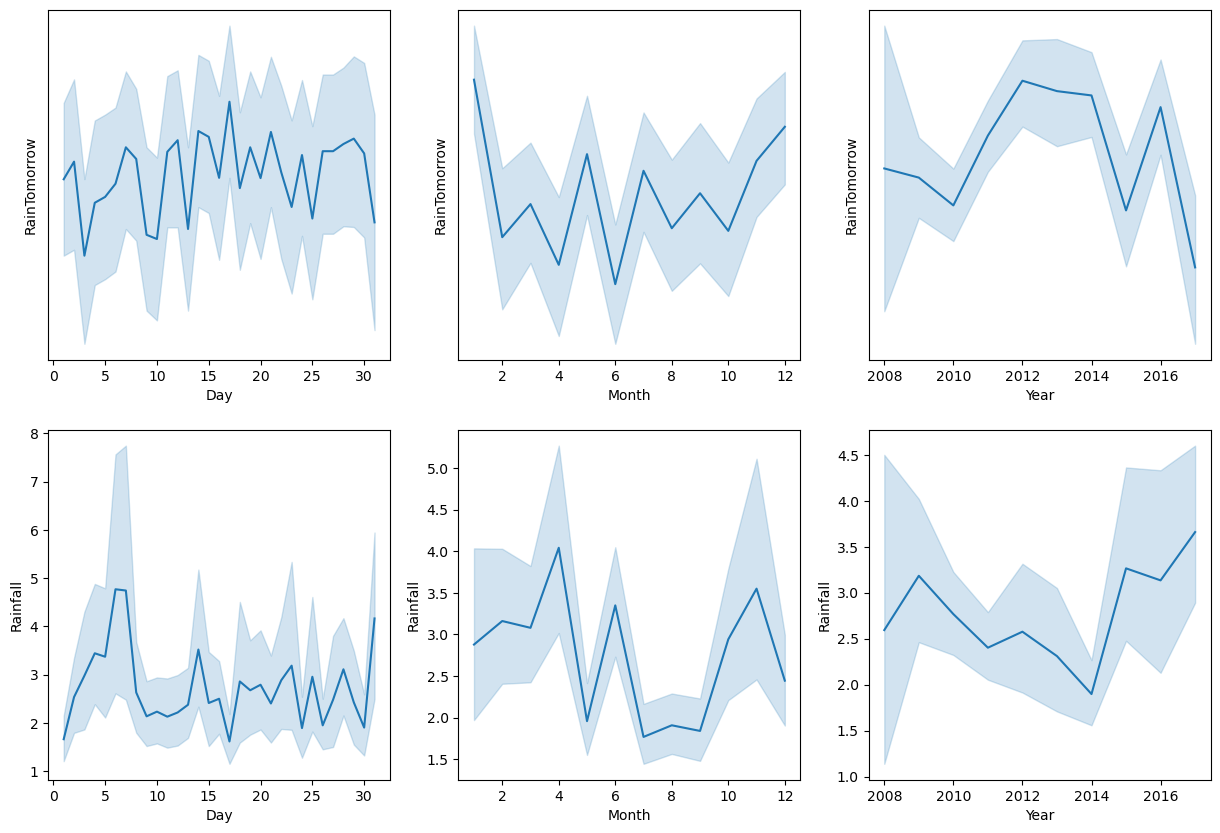

In [105]:
fig,axes=plt.subplots(2,3,figsize=(15,10))

#checking the relation between Day and RainTomorrow
sns.lineplot(x='Day',y='RainTomorrow',ax=axes[0,0],palette="green",data=data)

#checking the relation between Month and RainTomorrow
sns.lineplot(x='Month',y='RainTomorrow',ax=axes[0,1],palette="green",data=data)

#checking the relation between Year and RainTomorrow
sns.lineplot(x='Year',y='RainTomorrow',ax=axes[0,2],palette="green",data=data)

#checking the relation between Day and Rainfall
sns.lineplot(x='Day',y='Rainfall',ax=axes[1,0],palette="purple",data=data)

#checking the relation between Month and Rainfall
sns.lineplot(x='Month',y='Rainfall',ax=axes[1,1],palette="purple",data=data)

#checking the relation between Year and Rainfall
sns.lineplot(x='Year',y='Rainfall',ax=axes[1,2],palette="purple",data=data)

# Identifying the Outliers

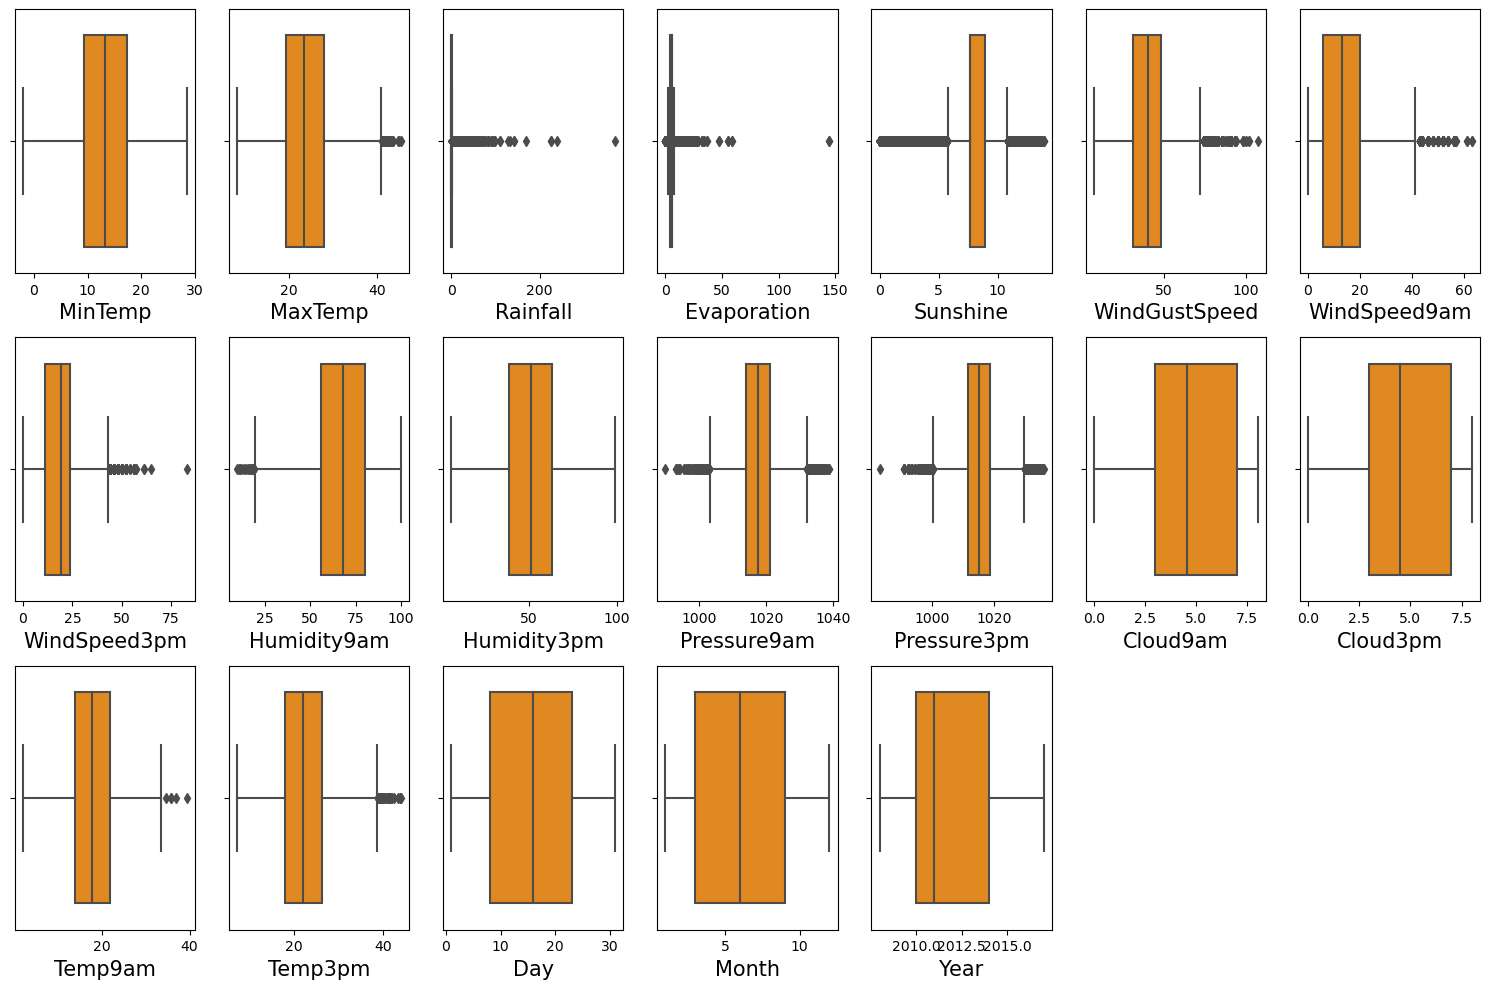

In [106]:
# Identifying the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=20:
        ax=plt.subplot(3,7,plotnumber)
        sns.boxplot(data[column],color="darkorange")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From the above boxplots, we can see that features having outliers are: MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

Lets remove the outliers using zscore method

# Removing Outliers

In [107]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [108]:
from scipy.stats import zscore
feature = data[['MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]

z=np.abs(zscore(feature))

z

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,1.570089e-01,0.206021,2.305893e-16,1.257472e-15,0.277710,0.607461,0.563297,0.189439,1.584003,1.308665,0.153712,0.108138
1,2.028121e-01,0.264165,2.305893e-16,1.257472e-15,0.277710,0.972321,0.357200,1.420268,1.121880,1.196072,0.100217,0.312348
2,3.009450e-01,0.264165,2.305893e-16,1.257472e-15,0.422897,0.508725,0.769394,1.777981,1.599939,1.051309,0.577390,0.127334
3,6.771214e-01,0.264165,2.305893e-16,1.257472e-15,1.174166,0.281166,0.982428,1.360650,0.006411,0.391836,0.060269,0.682376
4,1.380408e+00,0.167258,2.305893e-16,1.257472e-15,0.059928,0.676112,0.151104,0.845246,1.090010,1.485596,0.006773,1.220599
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,7.523137e-02,0.264165,2.305893e-16,1.257472e-15,0.666009,0.083694,0.776331,1.002937,1.109058,0.814518,1.366273,0.007221
8421,2.355231e-01,0.264165,2.305893e-16,1.257472e-15,1.319354,0.083694,0.982428,0.704843,0.933770,0.621501,1.223619,0.345987
8422,4.972110e-01,0.264165,2.305893e-16,1.257472e-15,0.230447,0.478639,0.982428,0.883699,0.535388,0.251553,0.938310,0.615099
8423,5.135665e-01,0.264165,2.305893e-16,1.257472e-15,0.883791,0.083694,1.188525,1.002937,0.280424,0.203299,0.474684,0.598279


In [109]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,NW,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,ENE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,N,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,WNW,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,N,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,24,6,2017


In [110]:
data.shape

(8425, 25)

In [111]:
new_df.shape

(7987, 25)

This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

# Percentage data loss:

In [112]:
loss_percent=(8425-7987)/8425*100
print(loss_percent,'%')

5.198813056379822 %


After Removing Outliers we remove 5% of the data.

# Checking the skewness of the dataset

In [113]:
new_df.skew().sort_values()

Sunshine        -0.723970
Cloud9am        -0.356892
Cloud3pm        -0.266829
Humidity9am     -0.231656
MinTemp         -0.084549
Temp9am         -0.038035
Day              0.002731
Pressure9am      0.020735
Pressure3pm      0.044876
Month            0.054460
Humidity3pm      0.125150
WindSpeed3pm     0.300109
MaxTemp          0.314510
Temp3pm          0.334170
Year             0.430100
WindGustSpeed    0.506897
WindSpeed9am     0.711395
Evaporation      0.846181
Rainfall         3.519090
dtype: float64

Here we set threshold for += 0.5 .

There Columns have Skewness
- 'MinTemp',
- 'MaxTemp'
- 'Rainfall'
- 'Evaporation'
- 'Sunshine'
- 'WindSpeed9am'
- 'WindSpeed3pm'
- 'Humidity9am'
- 'Humidity3pm'
- 'Pressure9am'
- 'Pressure3pm'
- 'Temp9am'
- 'Day'
- 'Month'
- 'Year'

# Encoding the categorical columns

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le=LabelEncoder()
new_df[cat_col]= new_df[cat_col].apply(le.fit_transform)
new_df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,1020.3,4.566622,4.503183,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,1019.1,4.566622,4.503183,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,1016.8,4.566622,4.503183,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,1016.5,3.000000,2.000000,15.1,26.0,0,0,24,6,2017


# Lets Check Correlation

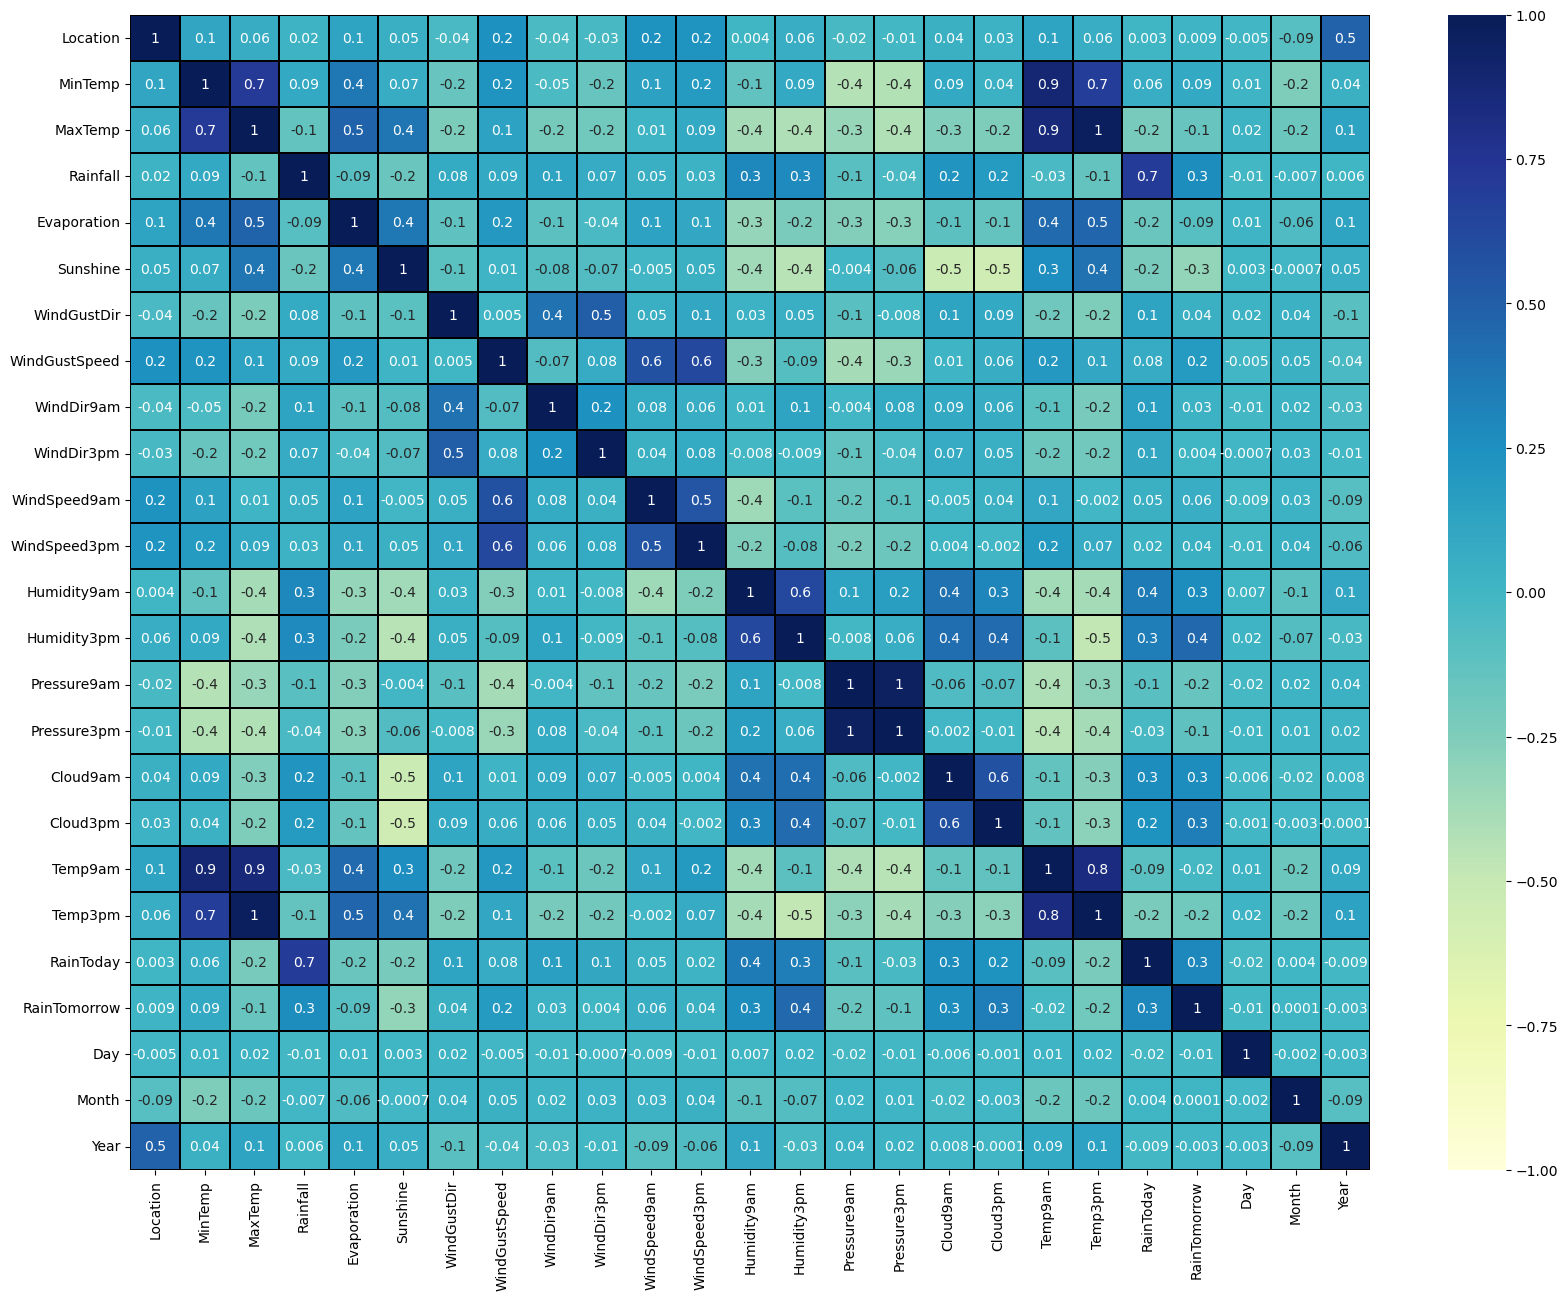

In [116]:
plt.figure(figsize=(20,15))    
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

# Observation 

MinTemp and Temp9AM -> 90% Relation

MinTemp and MaxTemp Have 70% Relation

MaxTemp and Temp9AM have 90% Relation

RainFall and RainToday 70% Relation

They might have created MultiCollinearity

In [117]:
cor =new_df.corr()
cor

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063798,0.017936,0.132245,0.048579,-0.037707,0.245658,-0.041030,-0.031195,...,-0.012288,0.041859,0.027050,0.118100,0.060707,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116694,1.000000,0.718598,0.088980,0.372576,0.065682,-0.154935,0.231097,-0.045231,-0.154184,...,-0.427936,0.089354,0.036649,0.888690,0.687570,0.061728,0.091021,0.010924,-0.247066,0.040001
MaxTemp,0.063798,0.718598,1.000000,-0.138506,0.468786,0.387050,-0.237955,0.136337,-0.217160,-0.190417,...,-0.414358,-0.252579,-0.248268,0.864864,0.974957,-0.219747,-0.149708,0.017068,-0.164351,0.120204
Rainfall,0.017936,0.088980,-0.138506,1.000000,-0.092388,-0.161877,0.081196,0.088198,0.121580,0.074577,...,-0.039030,0.220778,0.187137,-0.033526,-0.146589,0.697522,0.267970,-0.013772,-0.007054,0.005928
Evaporation,0.132245,0.372576,0.468786,-0.092388,1.000000,0.369080,-0.121384,0.200769,-0.115309,-0.036752,...,-0.275720,-0.116113,-0.146421,0.439628,0.454352,-0.163847,-0.089365,0.011560,-0.055232,0.124246
Sunshine,0.048579,0.065682,0.387050,-0.161877,0.369080,1.000000,-0.104739,0.009797,-0.076595,-0.069789,...,-0.063832,-0.527350,-0.541996,0.261680,0.403489,-0.219089,-0.317675,0.003451,-0.000727,0.054960
WindGustDir,-0.037707,-0.154935,-0.237955,0.081196,-0.121384,-0.104739,1.000000,0.005465,0.405681,0.507292,...,-0.008263,0.123415,0.093527,-0.185080,-0.249791,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.245658,0.231097,0.136337,0.088198,0.200769,0.009797,0.005465,1.000000,-0.069460,0.076737,...,-0.336132,0.013678,0.064375,0.198936,0.101786,0.076677,0.181478,-0.005232,0.045638,-0.035546
WindDir9am,-0.041030,-0.045231,-0.217160,0.121580,-0.115309,-0.076595,0.405681,-0.069460,1.000000,0.243622,...,0.081400,0.092396,0.062637,-0.101576,-0.224390,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154184,-0.190417,0.074577,-0.036752,-0.069789,0.507292,0.076737,0.243622,1.000000,...,-0.037280,0.073742,0.054321,-0.172000,-0.202000,0.100983,0.003674,-0.000714,0.028629,-0.010781


In [118]:
cor['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445891
Cloud3pm         0.337922
RainToday        0.294528
Humidity9am      0.269722
Cloud9am         0.269598
Rainfall         0.267970
WindGustSpeed    0.181478
MinTemp          0.091021
WindSpeed9am     0.057933
WindGustDir      0.044378
WindSpeed3pm     0.042472
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021459
Evaporation     -0.089365
Pressure3pm     -0.124953
MaxTemp         -0.149708
Pressure9am     -0.152692
Temp3pm         -0.191706
Sunshine        -0.317675
Name: RainTomorrow, dtype: float64

Here we can clearly see that humidy has the highest correlation with RainTomorrow and sun shine has the lowest correlation.

In [119]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.697522
Humidity9am      0.294276
Humidity3pm      0.288959
RainTomorrow     0.267970
Cloud9am         0.220778
Cloud3pm         0.187137
WindDir9am       0.121580
MinTemp          0.088980
WindGustSpeed    0.088198
WindGustDir      0.081196
WindDir3pm       0.074577
WindSpeed9am     0.051753
WindSpeed3pm     0.030343
Location         0.017936
Year             0.005928
Month           -0.007054
Day             -0.013772
Temp9am         -0.033526
Pressure3pm     -0.039030
Evaporation     -0.092388
Pressure9am     -0.098433
MaxTemp         -0.138506
Temp3pm         -0.146589
Sunshine        -0.161877
Name: Rainfall, dtype: float64

Here we can clearly see that RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

# Visualizing the correlation between label and features using bar plot

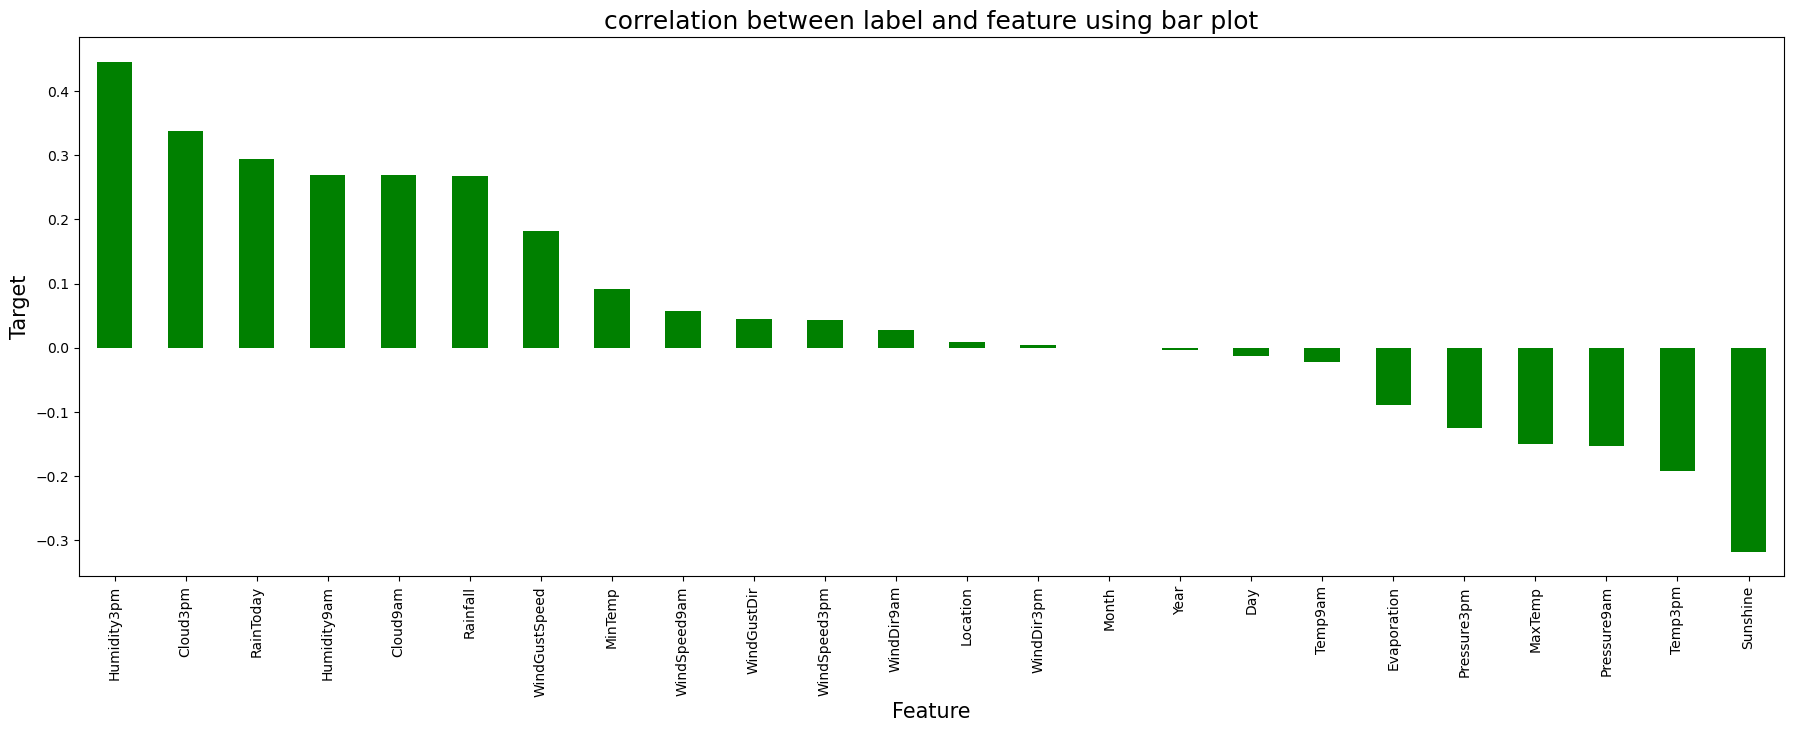

In [120]:
plt.figure(figsize=(22,7))
new_df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Observation

Maximum Correlation -> Humidity3PM, Cloud3PM,RainToday,Cloud9AM,Humidity9AM,Rainfall,Windspeed


Norelation -> WindSpeed3PM ,Location , Windir3PM , Day ,Month ,Year


We dont have to delete this because Location Day Month Year is imp for RainPrediction. 

# Prediction for Rain-Tomorrow

In [60]:
#Lets separate x and y
x=new_df.drop(columns='RainTomorrow')

In [61]:
y=new_df['RainTomorrow']

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056444,-0.145732,-0.264438,0.110484,-0.013374,1.229267,0.364103,1.250245,0.712891,...,-1.687142,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,-0.390661,0.110484,-0.013374,1.441960,0.364103,-0.277857,-0.987382,...,-1.202435,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,-0.390661,0.110484,-0.013374,1.654654,0.520531,1.250245,0.606624,...,-1.703856,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,-0.390661,0.110484,-0.013374,-0.684977,-1.200173,0.377044,-0.243513,...,-0.032451,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,-0.180289,0.110484,-0.013374,1.229267,0.129462,-1.369358,-0.668581,...,-1.169007,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,-0.390661,0.110484,-0.013374,-1.535751,-0.652677,0.377044,-0.030978,...,1.137532,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,-0.390661,0.110484,-0.013374,-0.259589,-1.356601,0.377044,-0.030978,...,0.953678,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,-0.390661,0.110484,-0.013374,-0.897670,-0.183394,0.377044,-0.456047,...,0.535827,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,-0.390661,0.110484,-0.013374,0.378492,-0.887318,0.595344,-0.030978,...,0.268402,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,0.942990,-0.123726,2.004134


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,Location,1.568620
1,MinTemp,8.785888
2,MaxTemp,26.411457
3,Rainfall,1.989564
4,Evaporation,1.541720
5,Sunshine,1.939220
6,WindGustDir,1.362100
7,WindGustSpeed,2.310536
8,WindDir9am,1.351829
9,WindSpeed9am,2.017847


Here we set threshold for VIF is 10 .. So Which Columns not come in range We are going to delete this.

In [62]:
x.drop(columns=['Pressure9am','Pressure3pm','Temp9am'],inplace=True)

NameError: name 'x' is not defined

# Selecting Kbest Features

In [443]:
from sklearn.feature_selection import SelectKBest, f_classif

In [444]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [445]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(35,'Score'))

          Feature        Score
12    Humidity3pm  1981.530539
14       Cloud3pm  1029.364731
5        Sunshine   896.276633
16      RainToday   758.469769
11    Humidity9am   626.486365
13       Cloud9am   625.864340
3        Rainfall   617.745142
15        Temp3pm   304.653895
7   WindGustSpeed   271.937255
2         MaxTemp   183.065685
1         MinTemp    66.707542
4     Evaporation    64.282695
9    WindSpeed9am    26.889499
6     WindGustDir    15.756523
10   WindSpeed3pm    14.429616
8      WindDir9am     5.864766
17            Day     1.246468
0        Location     0.679184
19           Year     0.080770
18          Month     0.000146


Here we have find with less relation Year , Moth , Day and Location. But we are not decided to delete this . Because all the features are imp for prediction.

# Lets Remove Skewness

In [60]:
from sklearn.preprocessing import PowerTransformer

In [61]:
scaler = PowerTransformer()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

NameError: name 'x' is not defined

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(x[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observation 

Here we can see that we remove most of the skewness..

# SMOTE

In [449]:
y.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

We can see that there is a significant difference in the classes hence lets fix this using SMOTE to avoid any bias.

In [450]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [451]:
y.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

Now our data is balanced, so we can build our ML model

In [452]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# LogisticRegression

In [454]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(100, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.7887266828872669 on Random State 175


In [455]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=175)

In [456]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7887266828872669

# Cross - validation for logistic Regression

In [457]:
from sklearn.model_selection import cross_val_score

In [458]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [459]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 70.61720687625068
accuracy_score is:- 78.87266828872669


At cv:- 5
Cross validation score is:- 71.0867802108678
accuracy_score is:- 78.87266828872669


At cv:- 6
Cross validation score is:- 69.81346309813463
accuracy_score is:- 78.87266828872669


At cv:- 7
Cross validation score is:- 72.81529604689172
accuracy_score is:- 78.87266828872669


At cv:- 8
Cross validation score is:- 72.9202648153245
accuracy_score is:- 78.87266828872669


At cv:- 9
Cross validation score is:- 73.17112733171128
accuracy_score is:- 78.87266828872669




In [460]:
lsscore_selected = cross_val_score(lr,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7317112733171127 
The accuracy score is:  0.7887266828872669


In [461]:
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))

# Random Forest Classifier

In [464]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(172, 175):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9452554744525548 on Random State 173


In [517]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=173)

In [518]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 94.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1237
           1       0.94      0.95      0.95      1229

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466


 Confusion Matrix: 
 [[1167   70]
 [  61 1168]]


# Cross - Validation for Random Forest classifier

In [467]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [468]:
for j in range(20,30):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 20
Cross validation score is:- 91.12249784251405
accuracy_score is:- 94.76885644768856


At cv:- 21
Cross validation score is:- 90.6906414711581
accuracy_score is:- 94.76885644768856


At cv:- 22
Cross validation score is:- 90.84662997430375
accuracy_score is:- 94.76885644768856


At cv:- 23
Cross validation score is:- 91.24199261163216
accuracy_score is:- 94.76885644768856


At cv:- 24
Cross validation score is:- 91.9150087352695
accuracy_score is:- 94.76885644768856


At cv:- 25
Cross validation score is:- 91.88371615573496
accuracy_score is:- 94.76885644768856


At cv:- 26
Cross validation score is:- 91.47071183313689
accuracy_score is:- 94.76885644768856


At cv:- 27
Cross validation score is:- 91.63071234695865
accuracy_score is:- 94.76885644768856


At cv:- 28
Cross validation score is:- 91.69339164237125
accuracy_score is:- 94.76885644768856


At cv:- 29
Cross validation score is:- 92.31383976611531
accuracy_score is:- 94.76885644768856




In [516]:
lsscore_selected = cross_val_score(rf,x,y,cv=24).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.9180128273197766 
The accuracy score is:  0.8742903487429035


# Gradient Boosting Classifier

In [474]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(808, 812):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8673965936739659 on Random State 810


In [472]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=810)

In [473]:
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 87.05%

==========================Test Result=======================
Accuracy Score: 86.40%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1828
           1       0.88      0.85      0.86      1871

    accuracy                           0.86      3699
   macro avg       0.86      0.86      0.86      3699
weighted avg       0.86      0.86      0.86      3699


 Confusion Matrix: 
 [[1603  225]
 [ 278 1593]]


# Cross - Validation for Gradient Boost

In [475]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [477]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 59.74933344250557
accuracy_score is:- 84.79318734793188


At cv:- 5
Cross validation score is:- 64.60665044606651
accuracy_score is:- 84.79318734793188


At cv:- 6
Cross validation score is:- 64.24979724249796
accuracy_score is:- 84.79318734793188


At cv:- 7
Cross validation score is:- 72.38671292412297
accuracy_score is:- 84.79318734793188


At cv:- 8
Cross validation score is:- 72.63012988685401
accuracy_score is:- 84.79318734793188


At cv:- 9
Cross validation score is:- 73.09002433090025
accuracy_score is:- 84.79318734793188




In [478]:
lsscore_selected = cross_val_score(gbc,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7309002433090025 
The accuracy score is:  0.8479318734793188


# XGBOOST

In [479]:
from xgboost import XGBClassifier

In [482]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(170,179 ):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    xgb=XGBClassifier()
    xgb.fit(x_train, y_train)
    pred = xgb.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.943227899432279 on Random State 173


In [483]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=173)

In [484]:
#import xgboost as xgb
xgb = XGBClassifier()

xgb.fit(x_train,y_train)

metric_score(xgb,x_train,x_test,y_train, y_test, train=True)

metric_score(xgb,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 99.59%

==========================Test Result=======================
Accuracy Score: 93.54%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1848
           1       0.95      0.92      0.93      1851

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699


 Confusion Matrix: 
 [[1753   95]
 [ 144 1707]]


# Cross - Validation for XGBOOST

In [485]:
pred_xgb = xgb.predict(x_test)
accu = accuracy_score(y_test,pred_xgb)

In [512]:
for j in range(4,10):
    cross = cross_val_score(xgb,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 61.37958931175821
accuracy_score is:- 87.42903487429035


At cv:- 5
Cross validation score is:- 69.23763179237632
accuracy_score is:- 87.42903487429035


At cv:- 6
Cross validation score is:- 67.72911597729117
accuracy_score is:- 87.42903487429035


At cv:- 7
Cross validation score is:- 75.26698911343895
accuracy_score is:- 87.42903487429035


At cv:- 8
Cross validation score is:- 76.2246698751211
accuracy_score is:- 87.42903487429035


At cv:- 9
Cross validation score is:- 76.60989456609894
accuracy_score is:- 87.42903487429035




In [177]:
lsscore_selected = cross_val_score(xgb,x,y,cv=28).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7907642484118192 
The accuracy score is:  0.9153279785809906


# SVC

In [487]:
from sklearn.svm import SVC

In [489]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(170, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS) 

Best Accuracy score is 0.8678021086780211 on Random State 175


In [500]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=175)

In [501]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 86.76%

==========================Test Result=======================
Accuracy Score: 86.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1279
           1       0.84      0.89      0.87      1187

    accuracy                           0.87      2466
   macro avg       0.87      0.87      0.87      2466
weighted avg       0.87      0.87      0.87      2466


 Confusion Matrix: 
 [[1085  194]
 [ 132 1055]]


# Cross - Validation for SVC

In [492]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [493]:
for j in range(22,30):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 22
Cross validation score is:- 80.3347454684353
accuracy_score is:- 85.42849418761827


At cv:- 23
Cross validation score is:- 80.5998849570462
accuracy_score is:- 85.42849418761827


At cv:- 24
Cross validation score is:- 80.61828894906239
accuracy_score is:- 85.42849418761827


At cv:- 25
Cross validation score is:- 80.60901199793054
accuracy_score is:- 85.42849418761827


At cv:- 26
Cross validation score is:- 80.78036864312679
accuracy_score is:- 85.42849418761827


At cv:- 27
Cross validation score is:- 81.02431244250506
accuracy_score is:- 85.42849418761827


At cv:- 28
Cross validation score is:- 81.11447934152017
accuracy_score is:- 85.42849418761827


At cv:- 29
Cross validation score is:- 81.28209962955556
accuracy_score is:- 85.42849418761827




In [502]:
lsscore_selected = cross_val_score(svc,x,y,cv=24).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8061828894906239 
The accuracy score is:  0.8542849418761828


# KNN

In [503]:
from sklearn.neighbors import KNeighborsClassifier

In [504]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(221, 235):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8742903487429035 on Random State 229


In [505]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=229)

In [506]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 90.13%

==========================Test Result=======================
Accuracy Score: 87.43%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      1212
           1       0.82      0.97      0.89      1254

    accuracy                           0.87      2466
   macro avg       0.89      0.87      0.87      2466
weighted avg       0.89      0.87      0.87      2466


 Confusion Matrix: 
 [[ 942  270]
 [  40 1214]]


# Cross - Validation for KNN

In [507]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [508]:
for j in range(20,30):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 20
Cross validation score is:- 82.24891599486412
accuracy_score is:- 87.42903487429035


At cv:- 21
Cross validation score is:- 82.13317208119558
accuracy_score is:- 87.42903487429035


At cv:- 22
Cross validation score is:- 82.12754936685417
accuracy_score is:- 87.42903487429035


At cv:- 23
Cross validation score is:- 82.42510425767688
accuracy_score is:- 87.42903487429035


At cv:- 24
Cross validation score is:- 82.49069902382415
accuracy_score is:- 87.42903487429035


At cv:- 25
Cross validation score is:- 82.69353130055596
accuracy_score is:- 87.42903487429035


At cv:- 26
Cross validation score is:- 82.63764328054802
accuracy_score is:- 87.42903487429035


At cv:- 27
Cross validation score is:- 82.64510047304013
accuracy_score is:- 87.42903487429035


At cv:- 28
Cross validation score is:- 82.74556792413935
accuracy_score is:- 87.42903487429035


At cv:- 29
Cross validation score is:- 82.98553457322704
accuracy_score is:- 87.42903487429035




In [509]:
lsscore_selected = cross_val_score(knn,x,y,cv=29).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8298553457322705 
The accuracy score is:  0.8742903487429035


# Selecting Best Model

We Select Random Forest for a hyperparameter tuning beacuse its gives us:
    
    Accuracy Score -> 90
    Cross Validation Score -> 86

In [519]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 94.53%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1237
           1       0.94      0.95      0.95      1229

    accuracy                           0.95      2466
   macro avg       0.95      0.95      0.95      2466
weighted avg       0.95      0.95      0.95      2466


 Confusion Matrix: 
 [[1168   69]
 [  66 1163]]


# Hyperparameter Tuning

In [520]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [521]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=949)

In [522]:
param = {
    'max_depth': range(2,12),
    'criterion':['entropy','gini'],
    'min_samples_split': range(2,16,2),
    
    'n_estimators':[150,300,450],
    'min_samples_leaf':[2,3,4,5,7,9]
}

In [523]:
rf=RandomForestClassifier()

In [524]:
rt = RandomizedSearchCV(rf,param_distributions = param)

rt.fit(x_train,y_train)
rt.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 11,
 'criterion': 'gini'}

In [535]:
rfc=RandomForestClassifier(max_depth=111 , min_samples_split=11, min_samples_leaf=7, criterion='entropy', n_estimators=300)
rfc.fit(x_train,y_train)

metric_score(rfc,x_train,x_test,y_train, y_test, train=True)

metric_score(rfc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 96.22%

==========================Test Result=======================
Accuracy Score: 90.13%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1889
           1       0.90      0.90      0.90      1810

    accuracy                           0.90      3699
   macro avg       0.90      0.90      0.90      3699
weighted avg       0.90      0.90      0.90      3699


 Confusion Matrix: 
 [[1698  191]
 [ 174 1636]]


Here we get 90% accuracy after hyperparameter tuning

In [536]:
from sklearn import metrics

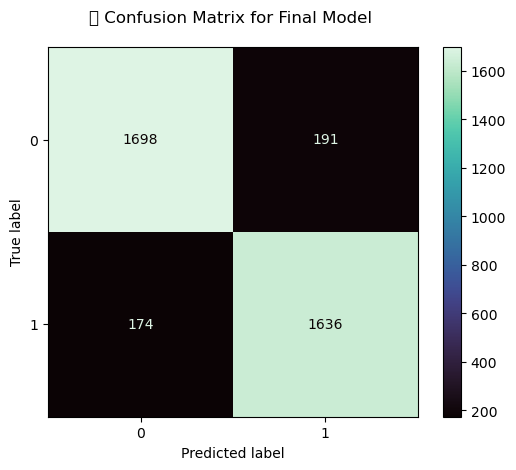

In [537]:
plt.style.use('default')
class_names = data.columns
metrics.plot_confusion_matrix(rfc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

# AUC ROC curve

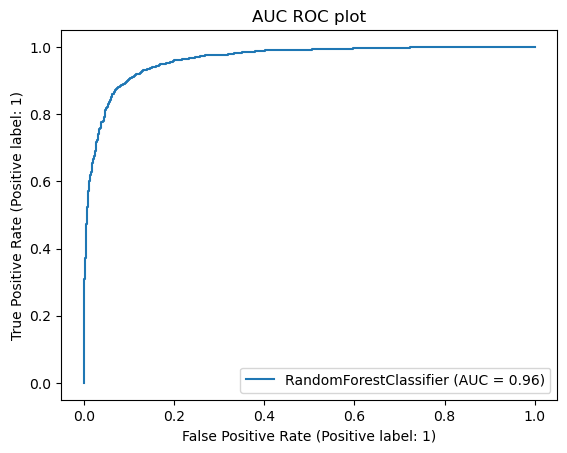

In [538]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

# Saving the model in pickle Format

In [539]:
# pickeling or serialization of a file
import pickle
filename = 'Rainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Final_Model.pkl'
pickle.dump(rfc, open(filename, 'wb'))

# Prediction Conclusion:

In [540]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(rfc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,1
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
3694,1,0
3695,0,0
3696,0,0
3697,0,0


In [541]:
df_comparisonc.to_csv('IRainfall_Prediction_Weather_Forecasting_Rain_Tomorrow_Prediction.csv')

# Prediction for Rainfall

# Data Preprocessing

# Splitting the label and feature

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [122]:
new_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,5,12,2008


In [123]:
x = new_df.drop("Rainfall", axis=1)
y = new_df["Rainfall"]

# Checking Correlation

In [124]:
cor['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.697522
Humidity9am      0.294276
Humidity3pm      0.288959
RainTomorrow     0.267970
Cloud9am         0.220778
Cloud3pm         0.187137
WindDir9am       0.121580
MinTemp          0.088980
WindGustSpeed    0.088198
WindGustDir      0.081196
WindDir3pm       0.074577
WindSpeed9am     0.051753
WindSpeed3pm     0.030343
Location         0.017936
Year             0.005928
Month           -0.007054
Day             -0.013772
Temp9am         -0.033526
Pressure3pm     -0.039030
Evaporation     -0.092388
Pressure9am     -0.098433
MaxTemp         -0.138506
Temp3pm         -0.146589
Sunshine        -0.161877
Name: Rainfall, dtype: float64

Here we can clearly see that RainToday has highest relation with Rainfall and sunshine has least correlation with Rainfall.

# Visualizing the correlation between label and features using bar plot

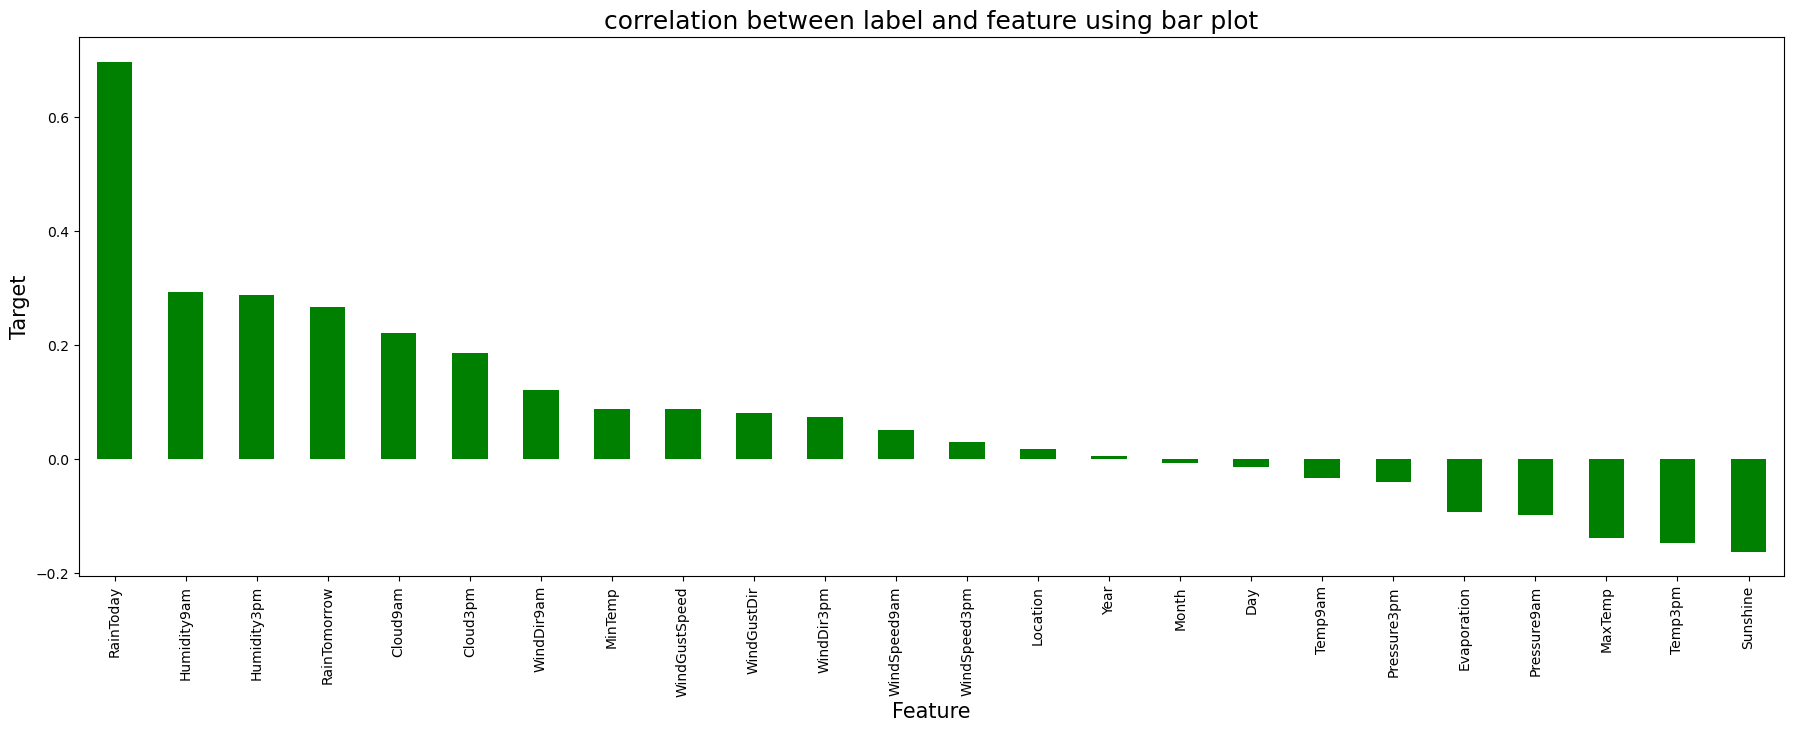

In [125]:
plt.figure(figsize=(22,7))
new_df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Using the above plot we can see the correlation between label and feature using bar plot.

# Feature Scaling using Standard Scaler

In [128]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056444,-0.145732,0.110484,-0.013374,1.229267,0.364103,1.250245,1.400214,0.712891,...,-1.398115,1.425345,0.013138,-0.138099,-0.098593,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058476,0.220676,0.110484,-0.013374,1.441960,0.364103,-0.277857,1.626597,-0.987382,...,-1.279988,0.011773,0.013138,-0.084254,0.329747,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036466,0.320605,0.110484,-0.013374,1.654654,0.520531,1.250245,1.626597,0.606624,...,-1.128109,0.011773,-1.076661,0.597788,0.141277,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724000,0.703668,0.110484,-0.013374,-0.684977,-1.200173,0.377044,-1.769138,-0.243513,...,-0.436219,0.011773,0.013138,0.077282,0.706687,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818306,1.419829,0.110484,-0.013374,1.229267,0.129462,-1.369358,-0.184462,-0.668581,...,-1.583744,1.013630,1.535531,0.023437,1.254963,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913248,-0.062457,0.110484,-0.013374,-1.535751,-0.652677,0.377044,-1.542755,-0.030978,...,0.829435,0.011773,0.013138,-1.358595,0.004208,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764592,0.253986,0.110484,-0.013374,-0.259589,-1.356601,0.377044,-1.089991,-0.030978,...,0.626930,0.011773,0.013138,-1.215007,0.364014,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430116,0.520464,0.110484,-0.013374,-0.897670,-0.183394,0.377044,1.400214,-0.456047,...,0.238796,0.011773,0.013138,-0.927832,0.638152,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984148,0.537119,0.110484,-0.013374,0.378492,-0.887318,0.595344,-1.089991,-0.030978,...,0.188170,-0.633229,-1.076661,-0.461172,0.621019,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# Checking Multicollinearity

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)# Finding varience inflation factor in each scaled column


In [133]:
calc_vif(x)

,Features,VIF values
0,Location,1.581369
1,MinTemp,8.808534
2,MaxTemp,26.433641
3,Evaporation,1.543219
4,Sunshine,1.956836
5,WindGustDir,1.618073
6,WindGustSpeed,2.396324
7,WindDir9am,1.351223
8,WindDir3pm,1.485556
9,WindSpeed9am,2.019858


We see multicolinearity exist in MaxTemp, Temp9am, Temp3pm, Pressure9am, Pressure3pm.

Here we set threshold for 10

In [134]:
# Dropping MaxTemp column
x.drop("Temp3pm",axis=1,inplace=True)
# Dropping Pressure9am column
x.drop("Pressure9am",axis=1,inplace=True)
# Dropping Temp9am column
x.drop("Temp9am",axis=1,inplace=True)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Random Forest

In [553]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(190, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7144071975063186 on Random State 195


In [136]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=195)

In [137]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [138]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,0.91,5.742,2.396183,0.714


# Cross - Validation of the model

In [570]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [572]:
for j in range(22,30):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 22
Cross validation score is:- 65.46938932186053
accuracy_score is:- 71.15216394634713


At cv:- 23
Cross validation score is:- 65.37370740917046
accuracy_score is:- 71.15216394634713


At cv:- 24
Cross validation score is:- 64.79385366277292
accuracy_score is:- 71.15216394634713


At cv:- 25
Cross validation score is:- 65.65798921283832
accuracy_score is:- 71.15216394634713


At cv:- 26
Cross validation score is:- 64.74366866367434
accuracy_score is:- 71.15216394634713


At cv:- 27
Cross validation score is:- 66.43483815006657
accuracy_score is:- 71.15216394634713


At cv:- 28
Cross validation score is:- 65.84536184267102
accuracy_score is:- 71.15216394634713


At cv:- 29
Cross validation score is:- 65.7030540365394
accuracy_score is:- 71.15216394634713




In [573]:
lsscore_selected = cross_val_score(rf,x,y,cv=27).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6606685045845437 
The accuracy score is:  0.7115216394634714


# Gradient Boosting Regressor

In [576]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

In [577]:
print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6085232284285707 on Random State 73


In [583]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=73)

In [584]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [585]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,1.177,8.452,2.907242,0.611


# Cross-validation of the model

In [587]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [581]:
for j in range(20,30):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 20
Cross validation score is:- 53.845682043190536
accuracy_score is:- 57.19643287410487


At cv:- 21
Cross validation score is:- 54.429901741226104
accuracy_score is:- 57.19643287410487


At cv:- 22
Cross validation score is:- 54.24384146197908
accuracy_score is:- 57.19643287410487


At cv:- 23
Cross validation score is:- 54.13454001637476
accuracy_score is:- 57.19643287410487


At cv:- 24
Cross validation score is:- 53.443331447827326
accuracy_score is:- 57.19643287410487


At cv:- 25
Cross validation score is:- 53.80870701023612
accuracy_score is:- 57.19643287410487


At cv:- 26
Cross validation score is:- 53.931971792505465
accuracy_score is:- 57.19643287410487


At cv:- 27
Cross validation score is:- 54.3649948734455
accuracy_score is:- 57.19643287410487


At cv:- 28
Cross validation score is:- 53.74679202674603
accuracy_score is:- 57.19643287410487


At cv:- 29
Cross validation score is:- 53.25745350523947
accuracy_score is:- 57.19643287410487




In [588]:
lsscore_selected = cross_val_score(gbr,x,y,cv=27).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.5430950931473497 
The accuracy score is:  0.6113326976764274


# KNeighbors Regressor

In [591]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(190, 200):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.5106351101886344 on Random State 195


In [592]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=358)

In [593]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [594]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,1.398,12.735,3.568622,0.517


# XGBRegressor

In [603]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7222414913303612 on Random State 79


In [146]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=79)

In [147]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [148]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,0.895,5.155,2.270429,0.731


# Cross-validation of the model

In [151]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [613]:
for j in range(10,20):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 10
Cross validation score is:- 62.507210696171114
accuracy_score is:- 72.22414913303612


At cv:- 11
Cross validation score is:- 61.790264056933964
accuracy_score is:- 72.22414913303612


At cv:- 12
Cross validation score is:- 65.02404068826058
accuracy_score is:- 72.22414913303612


At cv:- 13
Cross validation score is:- 64.16843865814724
accuracy_score is:- 72.22414913303612


At cv:- 14
Cross validation score is:- 63.415824335175394
accuracy_score is:- 72.22414913303612


At cv:- 15
Cross validation score is:- 63.781106285879375
accuracy_score is:- 72.22414913303612


At cv:- 16
Cross validation score is:- 61.933122845198405
accuracy_score is:- 72.22414913303612


At cv:- 17
Cross validation score is:- 63.716466176420525
accuracy_score is:- 72.22414913303612


At cv:- 18
Cross validation score is:- 63.411778312791036
accuracy_score is:- 72.22414913303612


At cv:- 19
Cross validation score is:- 63.41694479314345
accuracy_score is:- 72.22414913303612




In [152]:
from sklearn.model_selection import cross_val_score
lsscore_selected = cross_val_score(xgb,x,y,cv=12).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6465821434880833 
The accuracy score is:  0.7313411185389682


# Hyper parameter tuning

Here we are selecting Random Forest

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,0.91,5.742,2.396183,0.714


In [153]:
xgb = XGBRegressor()

In [164]:
parameters = {'n_estimators' : [100,200 ],
              
             'max_depth':range(4,8),
             'learning_rate':[0.1,0.3],
          'max_leaves':[1,5]}

In [165]:
grd = GridSearchCV(xgb,param_grid = parameters)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

Best Params  {'learning_rate': 0.1, 'max_depth': 7, 'max_leaves': 1, 'n_estimators': 200}


In [168]:
gbr = XGBRegressor(learning_rate= 0.1, max_depth= 7, max_leaves= 1, n_estimators= 200)

gbr.fit(X_train,y_train)

pred = gbr.predict(X_test)

r2_score(y_test,pred)

0.7264030888070546

# Plot Actual VS Predicted 

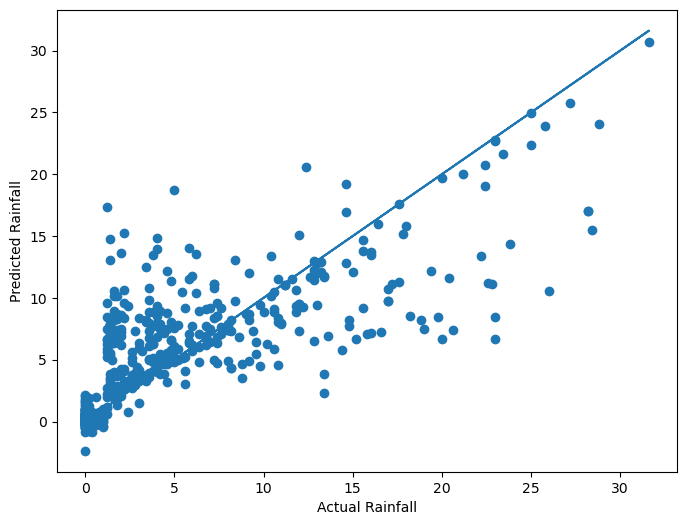

In [175]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.show()

In [171]:
import pickle
filename=('Rain Prediction')
pickle.dump(gbr,open(filename,'wb'))

In [172]:
loaded_model=pickle.load(open('Rain Prediction','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

72.64030888070546


In [173]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])

In [174]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,6379,6380,6381,6382,6383,6384,6385,6386,6387,6388
predicted,0.021917,-0.024366,31.150686,0.077275,0.055851,9.067150,9.407261,0.072004,0.137523,4.138356,...,3.196297,-0.011109,0.098273,10.179916,6.48828,0.303033,2.943672,0.050229,7.089026,-0.037589
original,0.137492,14.763789,9.302228,7.342960,0.051244,0.010018,0.047610,6.558057,1.805460,0.082174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Student of DataTrained
#Student of DataScience - Saurav
#Date -> 27-12-2022
#Time -> 17:33